In [ ]:
import sys 
import timeit 
import numpy as np 
print('array size \t  array memory \t view time \t  copy time \t copy_gc time')
for size in [1, 10, 100, 1000, 10000, 100000, 200000, 400000, 800000]: #1000000
    print(size, end='\t')
    my_array = np.arange(size, dtype=np.uint16)
    print(my_array.data.nbytes, end='\t') 
    view_time = timeit.timeit(
        'my_array.view()', f'import numpy; my_array = numpy.arange({size})')
    print(view_time, end='\t') 
    copy_time = timeit.timeit(
        'my_array.copy()', f'import numpy; my_array = numpy.arange({size})')
    print(copy_time, end='\t') 
    copy_gc_time = timeit.timeit( 
        'my_array.copy()', 
        f'import numpy; import gc; gc.enable(); my_array=numpy.arange({size})')
    print(copy_gc_time, end='\t') 
    print() 

array size 	  array memory 	 view time 	  copy time 	 copy_gc time
1	2	0.10217033599997194	0.263949206999996	0.2659698960001151	
10	20	0.09779467299995304	0.26816556400012814	0.2661784690001241	
100	200	0.09992884400003277	0.27169000699996104	0.2773297050000565	
1000	2000	0.10214569599997958	0.3667858349999733	0.37207540600002176	
10000	20000	0.09929910100004236	2.4295064969999203	2.464223461999836	
100000	200000	0.09692954900015138	93.52448806100006	92.16254270499985	
200000	400000	0.09914254500017705	215.55248349699968	214.92131006399995	
400000	800000	0.09662195200007773	202.52374606199965	201.37800891400002	
800000	1600000	0.10090701299986904	512.3439517820002	469.55342035500007	


**CORE Methods**
- Efficient computing and data storage 
- maximum performance from built-in features 
- concurrency, parallelism and asynchronous processing 
- high performance numpy
- re-implementing critical code with Cython 
- memory hierarchy, storage and networking 

**Applications**
- high performance Pandas and Apache Arrow
- storing big data 
- data analysis using GPU computing 
- applying big data with Dask

**Environment**
- setting up environment / Numba to generate efficient low level code 

**HW ecology (OnPremise/Cloud/Hybrid)**

- Storage: CPU cache, RAM, File System, SQL, NoSQL, Coud proprietary
- Network: Topology, Protocol, Speed, Latency 
- Network attached Storage 

# **Day 1**

**Use Integrated Surface Database for Python performance**

In [ ]:
""" downloading data and computing minimum temperatures """ 
import requests 
import sys, datetime, csv 
import collections 

"""
stations = sys.argv[1].split(',')
years = [int(year) for year in sys.argv[2].split('-') ]
"""
stations =['01044099999', '02293099999']
years = [2021, 2022]

start_year = years[0] ; end_year = years[1]


template_URL = \
'https://www.ncei.noaa.gov/data/global-hourly/access/{year}/{station}.csv'
template_FILE = 'station_{station}_{year}.csv'

def download_data(station, year):
  my_url = template_URL.format(station=station, year=year)
  req = requests.get(my_url)
  if req.status_code !=200: return'not found' 
  w = open(template_FILE.format(station=station, year=year), 'wt')
  w.write(req.text) 
  w.close()

def download_all_data(stations, start_year, end_year):
  for station in stations:
    for year in range(start_year, end_year +1):
      download_data(station, year)

def get_file_temperatures(file_name):
  temperature_ = []
  with open(file_name, 'rt') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
      station = row[header.index('STATION')]
      # date = datetime.datetime.fromisofformat (row[header.index('DATE')])
      tmp = row[header.index('TMP')]
      # +0020,1
      temperature, status = tmp.split(',')
      if status !='1': 
        continue 
      temperature = int(temperature) / 10 
      temperature_.append(temperature)
  return temperature_  

def get_all_temperatures(stations, start_year, end_year):
  temperatures = collections.defaultdict(list)
  for station in stations:
    for year in range(start_year, end_year +1):
      for temperature in \
      get_file_temperatures(template_FILE.format(station=station, year=year)):
        temperatures[station].append(temperature)
  return temperatures 

def get_min_temperatures(all_temperatures):
  return {station: min(temperatures) 
          for station, temperatures in all_temperatures.items()}

""" tie everything together """
download_all_data(stations, start_year, end_year)
all_temperatures = get_all_temperatures(stations, start_year, end_year)
min_temperatures = get_min_temperatures(all_temperatures)
# outout {01001099999: -0044, 01448099999: 0002}
min_temperatures

{'01044099999': -11.0, '02293099999': -27.6}

In [ ]:
%%writefile noaa_load_data.py

Writing noaa_load_data.py


In [ ]:
!cat noaa_load_data.py

In [ ]:
!python noaa_load_data.py 01044099999,01044099999 2021-2022

In [ ]:
!python -m cProfile -s cumulative noaa_load_data.py 01044099999,01044099999 2021-2022 > noaa_profile.txt

In [ ]:
!cat noaa_profile.txt

In [ ]:
!cat noaa_profile.txt | grep download

        1    0.001    0.001    2.095    2.095 noaa_load_data.py:28(download_all_data)
        4    0.000    0.000    2.094    0.523 noaa_load_data.py:20(download_data)


In [ ]:
""" use local caches to reduce the network usage of the module""" 
import os 
def download_all_data(stations, start_year, end_year): 
  for station in stations: 
    for year in range(start_year, end_year +1):
      # reduce network communication, save a copy of download the first time 
      if not os.path.exists(template_FILE.format(station=station, year=year)):
        download_data(station, year)

In [ ]:
%%writefile noaa_load_data_cache.py

Writing noaa_load_data_cache.py


In [ ]:
!python -m cProfile -s cumulative noaa_load_data_cache.py 01044099999,01044099999 2021-2022 > noaa_profile_cache.txt

In [ ]:
""" use python profiling, the built-in function to profile the script 
    detect performance bottleneck """ 

In [ ]:
""" profile distance cache """ 

"""
import math 
def get_locations():
  locations_ = []
  with open('locations.csv', 'rt') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
      station = row[header.index('STATION')]
      lat = row[header.index('LATITUDE')]
      lon = row[header.index('LONGTITUDE')]

      #yield station, (lat, lon)
      locations_.append(station, (lat, lon))
  return locations_

locations = {station: (lat, lon) for station, (lat, lon) in get_locations()}
"""


In [ ]:
def get_station_coordinates(file_name):
  locations_result = []
  with open(file_name, 'rt') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
      station = row[header.index('STATION')]
      lat = float(row[header.index('LATITUDE')])
      lon = float(row[header.index('LONGITUDE')])
      locations_result.append([station, (lat, lon)])
  return locations_result


def get_all_station_coordinates(stations, start_year, end_year):
  locations_ = collections.defaultdict(list)
  for station in stations:
    for year in range(start_year, end_year +1):
      for location in \
      get_station_coordinates(template_FILE.format(station=station, year=year)):
        locations_[station].append(location)

  return locations_ 

rs = get_all_station_coordinates(stations, start_year, end_year)

locations_ = {}

for key, items in rs.items(): 
  for item in items:
    if key not in locations_: 
      value = list()
      value.append(item[1])
      locations_[key] = value
    else:
      value = list(locations_.get(key))
      value.append(item[1])
      locations_[key] = value

len(locations_['01044099999']), len(locations_['02293099999'])

(19841, 48660)

In [ ]:
min(len(locations_['01044099999']), len(locations_['02293099999']))

19841

In [ ]:
!pip install jupyter_http_over_ws

In [ ]:
!jupyter serverextension enable --py jupyter_http_over_ws

Enabling: jupyter_http_over_ws
- Writing config: /root/.jupyter
    - Validating...
      jupyter_http_over_ws 0.0.7 OK


In [ ]:
!jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --NotebookApp.port_retries=0
    

In [ ]:
import math
def get_distance(p1, p2):
  lat1, lon1 = p1 ; lat2, lon2 = p2
  lat_dist = math.radians(lat2 - lat1)
  lon_dist = math.radians(lon2 - lon1)
  a = (
       math.sin(lat_dist/2) * math.sin(lat_dist/2) + 
       math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) + 
       math.sin(lon_dist/2) * math.sin(lon_dist/2)
  )
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  earth_radius = 6371
  dist = earth_radius * c
  return dist

def get_distances(stations, locations):
  distances = {}
  for first_i in range(len(stations) -1):
    first_station = stations[first_i]
    first_location = locations[first_station]
    cnt = 0 
    for second_i in range(first_i, len(stations)):
      second_station = stations[second_i]
      second_location = locations[second_station]
      for i in range (len(second_location)):
        if cnt > min(len(first_location), len(second_location)): 
          break 
        distances[(first_station, second_station)] = \
          get_distance(first_location[i], second_location[i])
        cnt +=1 
  return distances 
  
stations = sorted(locations_.keys())
distances = get_distances(stations, locations_) #locations_['01044099999']
distances

{('01044099999', '01044099999'): 4339.565483932866,
 ('01044099999', '02293099999'): 4992.932366200303}

In [ ]:
%%writefile noaa_distant_cache.py

Writing noaa_distant_cache.py


In [ ]:
!python -m cProfile -o noaa_distant_cache.prof noaa_distant_cache.py  01044099999,02293099999 2021-2022

In [ ]:
'running locally'

In [ ]:
""" visualize profiling 
    use pyutils.line_profiler from github """ 
!pip install line_profiler

In [ ]:
!ls

10-block.png	  10-size3-mandelbrot.png	 partial-1.csv
10-blockwise.png  dask-s.out			 sample_data
10-k-max.png	  FY2016-STC-Category-Table.csv  station_01044099999_2021.csv
10-k.png	  noaa_distant_cache.prof	 station_01044099999_2022.csv
10-k-sv.png	  noaa_distant_cache.py		 station_02293099999_2021.csv
10-persist.png	  noaa_load_data_cache.py	 station_02293099999_2022.csv
10-property.png   noaa_load_data.py		 taxes_2.parquet
10-rechunk.png	  noaa_profile_cache.txt	 taxes-dask-pandas-format.csv
10-repart.png	  noaa_profile.txt
10-single.png	  partial-0.csv


In [ ]:
import profile
!kernprof -l noaa_distant_cache.py  01044099999,02293099999 2021-2022

In [ ]:
!python -m line_profiler noaa_distant_cache.py.lprof

In [ ]:
!ls -altr noaa_distant_cache.py.lprof

In [ ]:
import profile
!kernprof -l lnoaa_distant_cache.py  01044099999,02293099999 2021-2022

In [ ]:
!python -m line_profiler noaa_distant_cache.py.lprof
""" total running time for our code """ 

# Optimize Data Structure

In [ ]:
""" optimize basic data structure lists, sets, dictionaries 
    timeit and benchmark the module """ 
print(stations, start_year, end_year)
download_all_data(stations, start_year, end_year)
all_temperatures = get_all_temperatures(stations, start_year, end_year)
first_all_temperatures = all_temperatures[stations[0]]
min(first_all_temperatures), max(first_all_temperatures)

['01044099999', '02293099999'] 2021 2022


(-11.0, 27.0)

In [ ]:
""" performance of list searches """ 
%timeit (-10.0 in first_all_temperatures)

97.3 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit (27 in first_all_temperatures)

364 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
""" why such performance? the in sequential scan starts from the beginning """ 
""" search using sets O(1) time """ 
set_first_all_temperatures = set(first_all_temperatures)
%timeit (-10.0 in set_first_all_temperatures)
%timeit (27 in set_first_all_temperatures)
""" magnitude faster than solution above 
    reasong is the built-in data structure for set in size and complexity""" 

93.6 ns ± 0.192 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
94.5 ns ± 0.218 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


' magnitude faster than solution above \n    reasong is the built-in data structure for set in size and complexity'

In [ ]:
""" List - Set - Dictionary in Python """ 
a_list_range = list(range(1000000))
a_set_range = set(a_list_range)

%timeit 50000 in a_list_range
%timeit 50000 in a_set_range 
%timeit 500000 in a_list_range
%timeit 500000 in a_set_range 

700 µs ± 4.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
69.1 ns ± 0.244 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
7.27 ms ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
68.8 ns ± 0.223 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
""" find excessive memory allocation """ 
""" memory usage of download all data """ 

""" use local caches to reduce the network usage of the module""" 
import os 
def download_all_data(stations, start_year, end_year): 
  for station in stations: 
    for year in range(start_year, end_year +1):
      # reduce network communication, save a copy of download the first time 
      if not os.path.exists(template_FILE.format(station=station, year=year)):
        download_data(station, year)

def get_all_files(stations, start_year, end_year):
  all_files = collections.defaultdict(list)
  for station in stations:
    for year in range(start_year, end_year +1):
      f = open(template_FILE.format(station=station, year=year), 'rb')
      content_ = list(f.read())
      all_files[station].append(content_)
      f.close()
  return all_files

start_year= 2010 ;  end_year= 2022

# stations = ['02242099999', '02245099999', '01044099999']
stations = ['01044099999', '02293099999']

download_all_data(stations, start_year, end_year)
all_files = get_all_files(stations, start_year, end_year)
all_files.keys(), all_files.values(), list(all_files.values())
print(sys.getsizeof(all_files.keys()), 
      sys.getsizeof(all_files.values()), 
      sys.getsizeof(list(all_files.values())))


40 40 72


In [ ]:
station_content = all_files[stations[0]]
len(station_content), sys.getsizeof(station_content), type(station_content[0])

(13, 184, list)

In [ ]:
station_content = all_files[stations[0]]
len(station_content[0]), sys.getsizeof(station_content[0]), type(station_content[0])

(1256869, 10055008, list)

In [ ]:
""" the id function allows us to get the unique ID from the object
    in CPython, the ID is the memory location  
    the length drops from 184 to 45  """ 
single_file_data = station_content[0]
all_ids = set()
for entry in single_file_data:
  all_ids.add(id(entry))
len(all_ids), sys.getsizeof(all_ids), type(all_ids)

(46, 2264, set)

In [ ]:
s1 = 'a' * 2
s2 = 'a' * 2 
s = 2
s3 = 'a' * s
s4 = 'a' * s 
print(s1, s2, s3, s4)
print(id(s1), id(s2), id(s3), id(s4), s1 == s4)

aa aa aa aa
140186213016368 140186213016368 140182390896880 140182390896752 True


In [ ]:
""" 
    Object overhear 
    ------------------------
    String  String overhead 
    Bytes   Bytes overhead 

"""
single_file_str_list = [chr(i) for i in single_file_data]
print(sys.getsizeof(single_file_str_list[0]))

50


In [ ]:
""" memory footprint of some alternative representations 
    strings and numbers  """ 
from sys import getsizeof 
getsizeof(''), getsizeof('c'), getsizeof('c' * 10000), getsizeof('' *10000), 

(49, 50, 10049, 49)

In [ ]:
single_file_str = ''.join(single_file_str_list)
sys.getsizeof(single_file_str), sys.getsizeof(single_file_str_list)

(1256918, 11007824)

In [ ]:
""" navigate the minefield of Python memory estimation """ 

In [ ]:
""" use arrays as a compact alternative to lists """ 
def get_all_files_clean(stations, start_year, end_year):
  all_files = collections.defaultdict(list)
  for station in stations:
    for year in range(start_year, end_year +1):
      f = open(template_FILE.format(station=station, year=year), 'rb')
      """ this line converts the output of the read function into a list 
          content_ = list(f.read())
          now, let's implement it without a list call, with a byte array instead
      """ 
      content_ = f.read()
      all_files[station].append(content_)
      f.close()
  return all_files

download_all_data(stations, start_year, end_year)
all_files_clean = get_all_files_clean(stations, start_year, end_year)
all_files_clean.keys(), all_files_clean.values(), list(all_files_clean.values())

station_content = all_files_clean[stations[0]]
single_file_data_clean = station_content[0]
print(type(single_file_data), sys.getsizeof(single_file_data))
""" arrays are fixed size, and can only be one representation, hence compact """ 
print(type(single_file_data_clean), sys.getsizeof(single_file_data_clean))

<class 'list'> 10055008
<class 'bytes'> 1256902


In [ ]:
""" systemize the findings on memory usage of Python objects 

    devise some code to get a good approximate of memory footprint
    1. write a function that returns the memory size of an object 
    2. return both the size and the expenditure on the containers  
    3. able to find: id tracking, container count 
       (including object mapper like dictionaries key-value), and 
       strings and arrays 

Note: Computing the size of general objects ia veritable minefiels, and not 
possible in general for external objects using Python. Do not double count 
repeated objects and also iterators that report the full size and 
content(strings/arrays)
"""
import collections, array, sys, types
from collections.abc import Iterable, Mapping 
from sys import getsizeof
from array import array 
from types import GeneratorType

def compute_allocations(obj):
  # store the id of previosly seen objext not to double count 
  ids_ = set([id(obj)])
  to_compute = [obj]
  allocation_size = 0 
  container_allocation = 0 
  while len(to_compute) > 0:
    obj_to_check = to_compute.pop()
    allocation_size += getsizeof(obj_to_check)
    # if instance string or array
    if type(obj_to_check) in (str, array):
      continue 
    # if instance of General Object
    elif isinstance(obj_to_check, GeneratorType):
      continue
    # if instance of dictionaries/maps count keys and values 
    elif isinstance(obj_to_check, Mapping):
      container_allocation += getsizeof(obj_to_check) 
      for ikey, ivalue in obj_to_check.items():
        if id(ikey) not in ids_:
          ids_.add(id(ikey))
          to_compute.append(id(ikey))
        if id(ivalue) not in ids_:
          ids_.add(value)
          to_compute.append(id(ivalue))
    # if instnace of list/iterable - strings included here not to count twice
    # strings and arrays are iterables returning the size of the content 
    # for iterators we check the size 
    elif isinstance(obj_to_check, Iterable):
      container_allocation += getsizeof(obj_to_check) 
      for inner in obj_to_check:
        if id(inner) not in ids_:
          ids_.add(id(inner))
          to_compute.append(inner)
  # we return the memory size and the memory spent in containers like maps/lists 
  return allocation_size, allocation_size - container_allocation

In [ ]:
""" start using generators for big-data in pipelining """ 

""" use generators instead of standard functioon by using yield """ 
def get_file_temperatures_gen(file_name):
  with open(file_name, 'rt') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
      station = row[header.index('STATION')]
      tmp = row[header.index('TMP')]
      temperature, status = tmp.split(',')
      if status !='1': 
        continue 
      temperature = int(temperature) / 10 
      yield temperature 

temperatures_1 = get_file_temperatures_gen(
    template_FILE.format(station='01044099999', year=2021))
type(temperatures_1), sys.getsizeof(temperatures_1),  

(generator, 112)

In [ ]:
def get_file_temperatures(file_name):
  temperature_ = []
  with open(file_name, 'rt') as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
      station = row[header.index('STATION')]
      tmp = row[header.index('TMP')]
      temperature, status = tmp.split(',')
      if status !='1': 
        continue 
      temperature = int(temperature) / 10 
      temperature_.append(temperature)
  return temperature_  

temperatures_2 = get_file_temperatures(
    template_FILE.format(station='01044099999', year=2021))

type(temperatures_2), sys.getsizeof(temperatures_2),

(list, 69152)

In [ ]:
""" Summarize before moving to concurrency, parallelism, 
    and asynchronous processing """ 

# **Day 2 -**

# Concurrency, parallelism and asynchronous processing
- Asynchronous processing to allow efficient response to ser requests 
- Threading in Python and its limitations
- Making multi-processing applications that can take full advantage of multi-core processors 

In [ ]:
""" Implementation of the scaffold for communication with clients 
    
    1. Use Python's asyncio library 
    2. all functions are declared async 
    3. These line can block and pause all other code around it 
    4. We use start_server from asyncio to call accept_request for each server 
    connection. Our server listening on local interface 127.0.0.1:8860 
    5. The async can be used 'with' keyword to make it non-blocking 
    6. We are telling our server to serve requests forever 
    7. The entry point in the code is the main function run 
"""

""" 1. Use Python's asyncio library """ 
import asyncio  
import pickle 

results = {}

""" 2. all functions are declared async """ 
async def submit_job(reader, writer): # 2. 
  job_id = max(list(results.keys()) + [0]) + 1
  """ 3. These line can block and pause all other code around it """ 
  writer.write(job_id.to_bytes(4, 'little'))
  results[job_id] = job_id * 3

async def get_results(reader, writer):
  """ 3. These line can block and pause all other code around it """ 
  job_id = int.from_bytes(await reader.read(4), 'little')
  pickle.dump(results.get(job_id, None), writer)

async def accept_requests(reader, writer):
  """ 3. These line can block and pause all other code around it """ 
  """ can take undetermined amount of time """ 
  op = await reader.read(1)
  if op[0] == 0:
    await submit_job(reader, writer)
  elif op[0] == 1:
    await get_results(reader, writer)

async def main():
  """ 4. We use start_server from asyncio to call accept_request """ 
  server = await asyncio.start_server(accept_requests, '127.0.0.1', 8860)
  """ 5. The async can be used 'with' keyword to make it non-blocking  """ 
  async with server:
    """ 6. We are telling our server to serve requests forever  """ 
    await server.serve_forever()

#asyncio.run(main())

In [ ]:
%%writefile server.py

Writing server.py


In [ ]:
""" Programming with Coroutines 

Coroutines: Functions that voluntarily release control of the execution 
Cooperative scheduling: releasing control is voluntarily and needs to be 
done explicitly in the code

A program that is waiting for some network data and is writting to a disk
  - 1. Main program schedules with the asynchronous executor two coroutines
      one for the network, and one to write to disk 
  - 2. the executor selects - maybe randomly - the network coroutine to start 
  - 3. the network coroutine setups the network listening 
       if there are no connections at the moment, it voluntarily tells the 
       executor to do something else 
  - 4. the executor starts the disk coroutine 
  - 5. the disk coroutine starts writing to the disk
       writing is going slowly than the CPU speed, so the coroutine tells the 
       executor to do something else 
  - 6. The executor continues the network coroutine 
  - 7. There are still no connection requests, the network coroutine yeilds 
  - 8. The executor schedules the disk coroutine 
  - 9. The disk coroutine finalizes writing and terminates its work 
  - 10. The executor let the network routine run forever with nothing more to do 
       If the network coroutine yields, the executor goes back to it 
  - 11. The network coroutine eventually answers a connection or maybe timeouts 
  - 12. The executor concludes and passes control back to the main program 

""" 
import asyncio 

async def accept_requests(reader, writer):
  op = await reader.read(1)
  # ... 

result = accept_requests(None, None)
print(type(result))

<class 'coroutine'>


In [ ]:
%%writefile client.py

Writing client.py


In [ ]:
""" Sending complex data from a simple synchronous client  

    1. Demonstrate how to do communication of data and code between processes 
    2. Example of synchronous type of code which is more common in DS
    3. This the final version of the client for the server-client framework 
"""
""" 1. marshal is used tosubmit code """ 
import marshal 
""" 2. pickle is used to submit most high-level Python data structures """ 
import pickle 
import socket 
from time import sleep 

""" 3. function defines as a single """ 
def m_funcs(v):
  def mapper(v):
    return v, 1 

  def reducer(m_args):
    v, obs = m_args
    if v and obs: 
      return v, sum(obs)
  """ 3. function that returns function map,reduce """
  return mapper, reducer 

def do_request(m_funcs,data_):
  """ 4. create a connection here """ 
  conn = socket.create_connection(('127.0.0.1', 1936))
  conn.send(b'x\00')
  """ 5. create a byte representation for the code here """ 
  code_ = marshal.dumps(m_funcs.__code__)
  conn.send(len(code_).to_bytes(4, 'little'))
  conn.send(code_)
  data = pickle.dumps(data)
  conn.send(len(data).to_bytes(4, 'little'))
  conn.send(data)
  """ 6. receive a job id and take care of encoding """ 
  job_id = int.from_bytes(conn.recv(4), 'little')
  conn.close()

  print(f'Getting data from job id {job_id}')
  result = None 
  while result is None: 
    """ 7. keep connecting until the result is ready """ 
    conn = socket.create_connection(('127.0.0.1'), 1936)
    conn.send(b'\x01')
    conn.send(job_id.to_bytes(4, 'little'))
    result_size = int.from_bytes(conn.recv(4), 'little')
    result = pickle.loads(conn.recv(result_size))
    conn.close()
  sleep(1)
  print(f'Result is {result}')

if __name__ == '__main__':
  do_request(m_funcs, 'Python is great. Python rocks'.split(' '))

In [ ]:
!ls
!python server.py

In [ ]:
!python client.py 

- Asynchronous Server 
- Naive MapReduce
  - Threaded MapReduce 
  - Multiprocess MapReduce 
- Complete Solution with Async and MapReduce 

# MapReduce Framework Implementation

'I am a fool to weep at what I am glad of' 

     Data.               Map.                  Shuffle.     Reduce.     Result 
     I fool at  I     -> (I, 1), (fool, 1) -> 
                      ---------------------     (glad, 1) (am, 1)      (am, 2)
                         (at, 1), (I, 1)        ------------------>.   (glad, 1)
                                                (fool, 1) (at, 1)      (I, 2)
     am to what of    ->(am, 1), (To, 1) ->     (weep, 1) (what, 1).   (of, 1)
                      ---------------------                            (a, 1)
                        (what, 1), (of, 1)                              --->
                                                                       (fool, 1)
     a  weep glad am  ->(a, 1), (weep, 1) ->    (I, 1) (am, 1)         (at, 1)
                      ----------------------    ------------------>    (weep, 1)
                                                (am, 1) (a, 1)         (to, 1)
                        (glad, 1), (am, 1).     (I, 1) (To, 1)         (weep, 1)
                                                                       (what, 1)
                                                                    

This is just the basics in terms of understanding. 
The traditional frameworks have several processed and/or threads implementing the map and reducer/result steps so that these use cases can be distributed across platforms.

In [ ]:
def reduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        value = next(it)
    else:
        value = initializer
    for element in it:
        value = function(value, element)
    return value

def counter(x):
  return x[0], sum(x[1]) 

reduce(lambda x, y: x*y, [1, 2, 3, 4, 5] )

120

In [ ]:
""" developing a simple test scenario """ 
from collections import defaultdict
#emiter = lambda word: (word, 1)
#counter = lambda word, emissions: (work, sum(emissions))

def counter(emitted): return emitted[0], sum(emitted[1]) 
def emiter(word): return word, 1
from collections import defaultdict

def map_reduce_very_naive(input, mapper, reducer):
  map_results = map(mapper, input)

  shuffler_ = defaultdict(list)
  for key, value in map_results:
    shuffler_[key].append(value)
  return map(reducer, shuffler_.items())

words = 'I am a fool to weep at what I am glad of'.split(' ')
results= map_reduce_very_naive(words, emiter, counter)
print('first attempt to implement the MapReduce Framework')
type(results), list(results)

first attempt to implement the MapReduce Framework


(map,
 [('I', 2),
  ('am', 2),
  ('a', 1),
  ('fool', 1),
  ('to', 1),
  ('weep', 1),
  ('at', 1),
  ('what', 1),
  ('glad', 1),
  ('of', 1)])

In [ ]:
""" Implement a concurrent-Threading version using concurrent futures """ 

""" 1. we use the threaded executor from the concurrent.future module """
from concurrent.futures import ThreadPoolExecutor as Executor
def map_reduce_still_naive(input, mapper, reducer):
  """ 2. the executor can work as a context manager """ 
  with Executor() as executor:
    """ 3. executors have a map function with blocking behavior """ 
    map_results = executor.map(mapper, input)
    """ 4. use a very simple shiffler function """ 
    distributor = defaultdict(list)
    for key, value in map_results:
      distributor[key].append(value)
    """ 3. executors have a map function with blocking behavior """ 
    results = executor.map(reducer, distributor.items())
  return results 

words = 'I am a fool to weep at what I am glad of'.split(' ')
results= map_reduce_still_naive(words, emiter, counter)
print('Use Threaded executor to implement the MapReduce Framework')
type(results), list(results)

Use Threaded executor to implement the MapReduce Framework


(generator,
 [('I', 2),
  ('am', 2),
  ('a', 1),
  ('fool', 1),
  ('to', 1),
  ('weep', 1),
  ('at', 1),
  ('what', 1),
  ('glad', 1),
  ('of', 1)])

In [ ]:
""" Implement a Asynchronous version using concurrent futures """ 
from concurrent.futures import ThreadPoolExecutor as Executor
from collections import defaultdict

def async_map(executor, mapper, input):
  futures = []
  for datum in input:
    """ 1. use submit instead of map when calling the executor """ 
    futures.append(executor.submit(mapper, datum))
  return futures 

def map_less_naive(executor, input, mapper):
  map_results = async_map(executor, mapper, input)
  return map_results 

from time import sleep

def emitter(word):
  #sleep(1)
  return word, 1 

with Executor(max_workers =4) as executor:
  """ 1. we use only 4 executors to le us keep progress/track with 5 tasks """
  maps = map_less_naive(executor, words, emitter)
  not_done =1 
  """ 2. we pront the status while there are still tasks to be done """ 
  while not_done > 0: 
    not_done = 0 
    for fut in maps:
      """ 3. check if the future is done"""
      not_done +=1 if not fut.done() else 0 
      """ 4. sleep for a bit """ 
      sleep(1)
      """ 2. print statement for tasks waiting """ 
    print(f'Still not finalized: {not_done}')

""" report progress that will require callback function 
       that will be called every half secs with statistical 
       information abot the jobs done """ 
def report_progress(futures, tag, callback):
  done = 0
  num_jobs = len(futures)
  while num_jobs > done:
    done = 0
    for fut in futures:
      if fut.done():
        done +=1 
    sleep(0.5)
    if callback:
      callback(tag, done, num_jobs - done)

def map_reduce_less_naive(input, mapper, reducer, callback=None):
  with Executor(max_workers=2) as executor:
    futures = async_map(executor, mapper, input)
    """  report progress for all map tasks """ 
    report_progress(futures, 'map', callback)
    """ because the results are actually futures we need to 
        get those from future objects """ 
    map_results = map(lambda f: f.result(), futures)
    distributor = defaultdict(list)
    for key, value in map_results:
      distributor[key].append(value)
    
    futures = async_map(executor, reducer, distributor.items())
    """ we report progress for all reduced tasks """ 
    report_progress(futures, 'reduce', callback) 
    results = map(lambda f: f.result(), futures)
  return results 

def reporter(tag, done, not_done):
  print(f'Operation {tag}: {done}/{done+not_done}')

words = 'Python is great Python rocks'.split(' ')
results = map_reduce_less_naive(words, emitter, counter, reporter)
list(results), 

Still not finalized: 0
Operation map: 3/5
Operation map: 5/5
Operation reduce: 0/4
Operation reduce: 4/4


([('Python', 2), ('is', 1), ('great', 1), ('rocks', 1)],)

In [ ]:
""" implementation with concurrent.futures """ 
from concurrent.futures import ProcessPoolExecutor as Executor 

def report_progress(futures, tag, callback):
  done = 0
  num_jobs = len(futures)
  while num_jobs > done:
    done = 0
    for fut in futures:
      if fut.done():
        done +=1 
        print(fut)
        print(fut.exception())
    sleep(0.5)
    if callback:
      callback(tag, done, num_jobs - done)
words = 'Python is great Python rocks'.split(' ')
results = map_reduce_less_naive(words, emitter, counter, reporter)
list(results), 

Operation map: 0/5
<Future at 0x7f7ec0548070 state=finished returned tuple>
None
<Future at 0x7f7ec05483d0 state=finished returned tuple>
None
<Future at 0x7f7ec3dd5580 state=finished returned tuple>
None
<Future at 0x7f7ebfd95490 state=finished returned tuple>
None
<Future at 0x7f7ebfd95280 state=finished returned tuple>
None
Operation map: 5/5
Operation reduce: 0/4
<Future at 0x7f7ec3dd57c0 state=finished returned tuple>
None
<Future at 0x7f7f6d9ea2e0 state=finished returned tuple>
None
<Future at 0x7f7ec42ed5e0 state=finished returned tuple>
None
<Future at 0x7f7ec42ed6d0 state=finished returned tuple>
None
Operation reduce: 4/4


([('Python', 2), ('is', 1), ('great', 1), ('rocks', 1)],)

In [ ]:
""" implementation on the multiprocessing module """ 
from collections import defaultdict
""" 1. import multiprocessing module """ 
import multiprocessing as mp 

def map_reduce(input, mapper, reducer):
  with mp.Pool(2) as pool:
    """ 2. with an instance pool create 2 processes """ 
    map_results = pool.map(mapper, input)
    distributor = defaultdict(list)
    for key, value in input:
      distributor(key).append(value)
    """ 3. the pool provides a synchronous map function """ 
    results = pool.map(reducer, distributor.items())


In [ ]:
""" implementation with concurrent.futures """ 
from concurrent.futures import ProcessPoolExecutor as Executor 

def report_progress_mp(map_returns, tag, callback):
  done = 0
  num_jobs = len(map_returns)
  while num_jobs > done:
    done = 0
    for return_ in map_returns:
      """  replace future.done with asyncreturn.ready """
      if return_.ready():
        done +=1 
        #print(return_)
        #print(fut.exception())
    sleep(0.5)
    if callback:
      callback(tag, done, num_jobs - done)

def async_map_mp(pool, mapper, input):
  async_returns = []
  for datum in input:
    async_returns.append(pool.apply_async(
        mapper, (datum, )))
  return async_returns

def map_reduce(pool, input, mapper, reducer, callback=None):
  map_returns = async_map_mp(pool, mapper, input)
  report_progress_mp(map_returns, 'map', callback)
  map_results = [ret.get() for ret in map_returns]
  distributor = defaultdict(list)
  for key, value in map_results:
    distributor[key].append(value)
  returns = async_map_mp(pool, reducer, distributor.items())
  results =  [ret.get() for ret in returns]
  return results 

pool = mp.Pool()
#words = 'Python is great Python rocks'.split(' ')
words = 'I am a fool to weep at what I am glad of'.split(' ')
results = map_reduce(pool, words, emitter, counter, reporter)
pool.close()
pool.join()
results

Operation map: 0/12
Operation map: 12/12


[('I', 2),
 ('am', 2),
 ('a', 1),
 ('fool', 1),
 ('to', 1),
 ('weep', 1),
 ('at', 1),
 ('what', 1),
 ('glad', 1),
 ('of', 1)]

In [ ]:
""" Transferring data in chunks """ 
def chunk(iterator_, chunk_size):
  chunk_list = []
  for element in iterator_:
    chunk_list.append(element)
    if len(chunk_list) == chunk_size:
      yield chunk_list 
      chunk_list = []
  if len(chunk_list) > 0:
    yield chunk_list

def chunk_runner(func_, data):
  ret = []
  for datum in data: 
    ret.append(func_(datum))
  return ret 

def chunked_async_map(pool, mapper, data, chunk_size):
  async_returns = []
  for data_part in chunk(data, chunk_size):
    async_returns.append(pool.apply_async(
        chunk_runner, (mapper, data_part)))
  return async_returns 

def chunk0(list_, chunk_size):
  for i in range(0, len(list_), chunk_size):
    yield list_[i:i + chunk_size]

def map_reduce_w_chunks(pool, input, mapper, reducer, chunk_size, callback=None):
  map_returns = chunked_async_map(pool, mapper, input, chunk_size)
  report_progress_mp(map_returns, 'map', callback)
  map_results = []
  for ret in map_returns:
    map_results.extend(ret.get())
  distributor = defaultdict(list)
  for key, value in map_results:
    distributor[key].append(value)
  returns = chunked_async_map(pool, reducer, distributor.items(), chunk_size)
  results = []
  for ret in returns:
    results.extend(ret.get())
  return results


In [ ]:
""" upload guttenberg.txt file """
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving guttenberg.txt to guttenberg.txt
User uploaded file "guttenberg.txt" with length 2027511 bytes


In [ ]:
!cat guttenberg.txt | wc

  40221  352804 2027511


In [ ]:
%%writefile utility.py

Writing utility.py


In [ ]:
""" process the entire e-book guttenberg """ 
words = [word for word in map(lambda x: x, 
  ' '.join(open('guttenberg.txt', 'rt', 
                encoding='utf-8').readlines()).split(' ') )]
""" very fast with lambda function """ 
words 

#chunk_size = int(sys.argv[1])
chunk_sizes = [1, 10, 100, 1000, 10000]

chunk_size = 1000
pool = mp.Pool()
counts = map_reduce_w_chunks(
    pool, words, emitter, counter, chunk_size, reporter)
pool.close()
pool.join()

""" running times for different chunk sizes 
chunk size      time (s)
1               123 
10              13 
100             3-4 
1000            1
10000           1
"""
len(counts)

Operation map: 34/361
Operation map: 361/361


34617

**Architect High Performance Solution**

In [ ]:
from prompt_toolkit.utils import threading
""" High Performance Solution 

Design the architecture with front end clients asynchronous 
Send the work to a thread via queues
Let the thread be responsible for managing a pool of processes that will
do tha map-reduce work 
Front-end TCP server implemented inside the asyncronous loop
The second thread manages the MapReduce multiprocessing pool 
Communication between two threads is done with queue from the queue module 
like in modern archtectures 

client --- \ |                      |             |
             |.-> Job queue ->      | MapReduce   | Work requests
client ------|                      | Management  | Map Reduce jobs
             |.<- Response queue <- | Thread      |
client --- / |                      |
"""
# server.py 
import asyncio
import threading
import multiprocessing as mp
import types
from queue import Queue, Empty 

work_queue = Queue()
results_queue = Queue()
results = {}

async def accept_requests(reader, writer):
  op = await reader.read(1)
  if op[0] == 0:
    await submit_job(reader, writer)
  elif op[0] == 1:
    await get_results(reader, writer)

""" first implementation """

""" 1. This function is called on the new thread  """
def worker():
   """ 2. the pool created inside the worker thread """
   pool = mp.Pool()
   while True:
     """ 3. the worker thread waits for some work to do 
            worker creates the multiprocessing pool and deals 
            with request from asynchronous server """
     job_id, code, data = work_queue.get()
     func = types.FunctionType(code, globals(), 'mapper_and_reducer')
     mapper, reducer = func()
     counts = map_reduce(
         pool, data, mapper, reducer, 100, reporter)
     """ 4. results are put on the response queue 
            the queue module makes sure the queues are synchronized 
            and with the locking mechanism in place """ 
     results_queue.put((job_id, counts))
   pool.close()
   pool.join()

""" our main entry point, main, prepares the asynchronous infrastructure 
as before it also creates and starts the thread that will manage 
MapReduce pool which is implemented in the function worker """ 
async def main():
  server = await asyncio.start_server(accept_requests, '127.0.0.1', 1936)
  """ 5. a thread prepared pointing at worker as the starting point """ 
  worker_thread = threading.Thread(target=worker)
  """ 6. the thread is started """
  worker_thread.start()
  async with server:
    try: 
      await server.serve_forever()
    except asyncio.exceptions.CancelledError:
      print('server cancelled')

#asyncio.run(main())

In [ ]:
%%writefile hp_server.py 

Writing hp_server.py


In [ ]:
!python hp_server.py

In [ ]:
""" implement job submission """

""" template for job submission into a work queue """
async def submit_job(job_id, reader, writer):
  writer.write(job_id.to_bytes(4, 'little'))
  writer.close() 
  code_size = int.from_bytes(await reader.read(4), 'little') 
  code_part = marshal.loads(await reader.read(4), 'little')
  data_size = int.from_bytes(await reader.read(4), 'little') 
  data = pickle.loads(await reader.read(data_size))  
  """ we write back to the work_queue, non-blocking """
  work_queue.put_nowait((job_id, code_part, data))

""" asynchronous part """ 
def get_results_queue():
  """ find queue size to see if something has arrived """
  while results_queue.qsize() > 0:
    try: 
      """ read the response from results_queue non-blocking """ 
      job_id, data = results_queue.get_nowait()
      results[job_id] = data 
    except Empty:
      """ provision for an empty queue """ 
      return 

async def get_results(reader, writer):
  get_results_queue()
  job_id = int.from_bytes(await reader.read(4), 'little')
  data = pickle.dumps(None)
  if job_id in results:
    data = pickle.dumps(results[job_id])
  writer.write(len(data).to_bytes(4, 'little'))
  writer.write(data)

""" same method as in the above section adding job_id in params list """
async def accept_requests(reader, writer, job_id=[0]):
  op = await reader.read(1)
  if op[0] == 0:
    await submit_job(job_id[0], reader, writer)
    job_id[0] +=1
  elif op[0] == 1:
    await get_results(reader, writer)
  

In [ ]:
""" a more robust version of the server """ 
import signal 
import functools
from time import sleep as sync_sleep 
from threading import Thread 

def handle_interrupt_signal(server):
  server.close()
  while server.is_serving():
    sync_sleep(0.1)

def init_worker():
  signal.signal(signal.SIGINT, signal.SIG_IGN)

async def main():
  server = await asyncio.start_server(accept_requests, '127.0.0.1', 1936)
  mp_pool = mp.Pool(initializer=init_worker)
  loop = asyncio.get_running_loop()
  loop.add_signal_handler(signal.SIGINT, 
       functools.partial(handle_interrupt_signal, server =server))
  worker_thread = threading.Thread(
      target=functools.partial(worker, pool= mp_pool))
  worker_thread = threading.Thread(target=worker)
  worker_thread.start()
  async with server:
    try: 
      await server.serve_forever()
    except asyncio.exceptions.CancelledError:
      print('server cancelled')
  work_queue.put((-1, -1, -1))
  worker_thread.join()
  mp_pool.close()
  mp_pool.join()
  print('ended ')

In [ ]:
""" a worker thread version better than before to explicitly cleanup"""
def worker():
   pool = mp.Pool()
   while True:
     job_id, code, data = work_queue.get()
     if job_id == -1:
       break
     func = types.FunctionType(code, globals(), 'mapper_and_reducer')
     mapper, reducer = func()
     counts = map_reduce(pool, data, mapper, reducer, 100, reporter)
     results_queue.put((job_id, counts))
   print('Worker thread terminating')
   pool.close()
   pool.join()

In [ ]:
%%writefile hp_server_robust.py 

Writing hp_server_robust.py


In [ ]:
!ls -altr hp_server_robust.py 

-rw-r--r-- 1 root root 3427 Dec 19 02:20 hp_server_robust.py


In [ ]:
!python hp_server_robust.py 

server cancelled
Worker thread terminating
ended 


In [ ]:
""" test with the client the perfoamnce """

**Summary**
1- Asynchrnonus communication is very efficient processing simultaneous requests where the communication is small and the amount of processing requests if equal to the most common pattern with the web servers 

2- Threading is very useful for architecture design process however it isn't quite helpful for use with Python as the Python implementation is slow. We can look into other options 

3- Python multi-processing is possible to make use of CPU cores even with low-level python code. Same for use with GPU. Explore other alternatives for CPU/GPU architecture 

4- Best practice with Python: Keep the computing granularity course as too much communication can effect the performance of your solution (slows down)

5- Run away from shared memory and low level locks. If we need them explore other options - implement a sequential solution in a lower-level language. 


**Addition - Recap of utilities with I/O** 

**API read N characters with buffer** 

In [ ]:
%%writefile sample-guttenberg.txt 
The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.


Writing sample-guttenberg.txt


In [ ]:
def read4_file(filename, bf_size, iterations):  
  with open('sample-guttenberg.txt', 'rt') as fileObj:
    result = fileObj.read() 
    return result

queries = [1, 2, 1]
filename = 'sample-guttenberg.txt'
bf_size = 6
readN_1 = read4_file(filename, bf_size, 1)
readN_2 = read4_file(filename, bf_size, 2)
readN_1, #readN_2

In [ ]:
"""
API read4 reads four consecutive characters from the file 
  parameter: char[] buf4 
  returns: int

|a|b|c|d|e|f| -> buf4 = 'abcd' 
read 4 characters from the buffer 'abcd', return 4 
read 4 characters from the buffer 'ef', return 2
read 4 characters from the buffer '', return 0

Sequence: read(buf4); read(buf4); read(buf4)
Only read4 is avaiable as a function, cannot access directly read

with open('sample-guttenberg.txt', 'rt', encoding='utf-8') as file_obj:
    #file_content = file_obj.read() # not available 
    buff4 = file_obj.read4()
    # buff4 = file_obj.read4() .... 

file ="The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy"
queries = [1, 2, 1]
output: [1, 2, 1]
------------------------------
queries = [10, 10, 1]
output: [10, 10, 1]
'The Proje' - 10 characters 
'ct Gutenbe' - 10 characters 
'rg' - 2 characters 
------------------------------
queries = [4, 4, 4, 4, 4, 4]
output =  [4, 4, 4, 4, 4, 2]

file = 'abc', queries = [4, 1], output = [3, 0]
api.read(buf, 4) -> 3
api,read(buf, 1) -> 0
file = 'abc', queries = [1, 2, 1], output = [1, 2, 0]
api.read(buf, 1) -> 1
api,read(buf, 2) -> 2
api.read(buf, 1) -> 0 

buffer a destination not a source 

examples of constraints 
1 <= file.length <= 1,000,000
1 <= queries.length <= 250
1 <= queries[1] <= 1024
"""
print()

In [ ]:
import collections

class Reader:
  def __init__(self):
    self.queue_data = collections.deque() 

  def read4(self, buf4):
    count = 0 
    for i in range(len(buf4)):
      if buf4[i] != '': count +=1
    return count
  
  def reader_queries(self, str_list, n_list):
    for i in range(len(str_list)): self.queue_data.append(str_list[i])
    print(self.queue_data)
    res = []
    for item in n_list:
      buf4 = [''] * item
      i = 0 ; cnt =0
      print('iteration: ', item )
      while item > 0:
        if self.queue_data:
          buf4[i] = self.queue_data.popleft()
          i += 1 
          item -= 1
        else:
          readn = self.read4(buf4)
          cnt = readn 
          if readn ==0:
            break 
          self.queue_data.extend(buf4[:readn]) 
        print(self.queue_data)
      res.append(i) if cnt==0 else res.append(cnt)
    return res

str_ = "The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy"
str_ = "The Project"
#str_ = 'abcdef'
queries = [4, 4, 2]

# queries = [10, 10, 1]
# output: [1, 2, 1]
#queries = [1, 2, 1]
# output: [1, 2, ]
file = list(str_)
reader = Reader()
# 'Complete - with all test cases ' - it is a fundamental concept - Hard problem
reader.reader_queries(file, queries)

deque(['T', 'h', 'e', ' ', 'P', 'r', 'o', 'j', 'e', 'c', 't'])
iteration:  4
deque(['h', 'e', ' ', 'P', 'r', 'o', 'j', 'e', 'c', 't'])
deque(['e', ' ', 'P', 'r', 'o', 'j', 'e', 'c', 't'])
deque([' ', 'P', 'r', 'o', 'j', 'e', 'c', 't'])
deque(['P', 'r', 'o', 'j', 'e', 'c', 't'])
iteration:  4
deque(['r', 'o', 'j', 'e', 'c', 't'])
deque(['o', 'j', 'e', 'c', 't'])
deque(['j', 'e', 'c', 't'])
deque(['e', 'c', 't'])
iteration:  2
deque(['c', 't'])
deque(['t'])


[4, 4, 2]

**Read4 slightly different implementation with cache**

In [ ]:
""" to do """

In [ ]:
class My_Queue(object):
  def __init__(self, data=None): 
    self.items = []
    self.data = data
    if self.data is not None:
      for element in data: 
        self.items.append(element)

  def enqueueleft(self, item): 
    self.items.insert(0, item)
  def enqueue(self, item): 
    self.items.append(item)
  def dequeue(self):
    if not self.isEmpty(): 
      self.items.pop()
  def dequeueleft(self):
    if not self.isEmpty(): 
      self.items.pop(0)
  def isEmpty(self): 
    return len(self.items) == 0
  def len(self): 
    return len(self.items)
instance_q = My_Queue('Testing Init')
instance_q.isEmpty(), instance_q.len(), instance_q.items

(False, 12, ['T', 'e', 's', 't', 'i', 'n', 'g', ' ', 'I', 'n', 'i', 't'])

In [ ]:
buf4 = [''] * 5 # fixed size, need to extend 
buf4_ = []
l_ = ['a', 'b', 'c', 'e', 'f']
n = 0
for i in range(len(l_)):
  if n <= len(buf4) +1:
    buf4[i] = l_[i] 
    n +=1
  else:
    break 
buf4, buf4_

(['a', 'b', 'c', 'e', 'f'], [])

**Working with Files**

In [ ]:
with open('sample-guttenberg.txt', 'rt') as fp:
  content = fp.read(4)
  line = fp.readline()
  all_content = fp.read()
  all_content_lines = fp.readlines()

with open('sample-test.txt', 'wt') as fp:
  fp.writelines('google colaborative user ')
  fp.writelines('testing File I/O with python.')
  fp.writelines('Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy')
  fp.truncate()

with open('sample-test.txt', 'rb') as fp:
  content_header = fp.read(4)
  content_sample = fp.read()

content, line, content_header, content_sample 

('The ',
 'Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy\n',
 b'goog',
 b'le colaborative user testing File I/O with python.Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy')

**Reading files in binary mode with the struct module**

In [ ]:
import struct 
record_format = 'hd4s'

""" reading files in binary mode with the struct module """ 
record_size = struct.calcsize(record_format)
record_list, record_list_structured = [], []
input_data = open('sample-test.txt', 'rb') 
cnt = 0
while 1:
  cnt +=1
  record = input_data.read(record_size)
  if cnt == 5: #end of file character
    input_data.close()
    break 
  record_list_structured.append(struct.unpack(record_format, record)) 
  record_list.append((record_format, record_size, record))

record_size, list(record_list), record_list_structured, \
struct.pack(record_format, 7, 3.14, b'template')

(20,
 [('hd4s', 20, b'google colaborative '),
  ('hd4s', 20, b'user testing File I/'),
  ('hd4s', 20, b'O with python.Projec'),
  ('hd4s', 20, b't Gutenberg eBook of')],
 [(28519, 3.997306423170864e+252, b'ive '),
  (29557, 1.7016872550871644e+214, b'e I/'),
  (8271, 4.315905043553391e+242, b'ojec'),
  (8308, 5.924159555021306e+228, b'k of')],
 b'\x07\x00\x00\x00\x00\x00\x00\x00\x1f\x85\xebQ\xb8\x1e\t@temp')

**Picking objects into files**

In [ ]:
""" picking objects into files """ 
import pickle 

file_read_a = open('sample-guttenberg.txt', 'rb') 
content_data_for_pckl = file_read_a.read()
pickle.dumps(content_data_for_pckl)
file_read_a.close()

""" serialize """
a = 'a'; b='b' ; c ='c'
file_data_write = open('sample-test-write.txt', 'wb') 
pickle.dump(a, file_data_write)
pickle.dump(b, file_data_write)
pickle.dump(c, file_data_write)
file_data_write.close()

""" deserialize """
file_data_read = open('sample-test-write.txt', 'rb') 
a = pickle.load(file_data_read)
b = pickle.load(file_data_read)
c = pickle.load(file_data_read)
file_data_read.close()

def save_data():
  global a, b, c 
  file_descriptor = open('sample-test-write.txt', 'w')
  data = {'a':a, 'b':b, 'c':c}
  pickle.dump(data, file_descriptor)
  file_descriptor.close()

def restore_data():
  global a, b, c 
  file_descriptor = open('sample-test-write.txt', 'r')
  data = pickle.load(file_descriptor)
  file_descriptor.close()
  a = data['a']
  b = data['b']
  c = data['c']


**File names, search, compression and regular expression**

**System level commands**

In [ ]:
import pathlib

In [ ]:
path_ = pathlib.Path('/content/sample_data/README.md')
path_.read_text()
path_.write_text('This File is modified by Google Colab User on December 18th, 2022')
path_.read_text()

'This File is modified by Google Colab User on December 18th, 2022'

In [ ]:
!pip install PyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yaml
import json
with open('my_config.json', 'r') as fp:
  config_ = json.load(fp)
config_

{'_from': 'jsbn@~0.1.0',
 '_id': 'jsbn@0.1.1',
 '_inBundle': False,
 '_integrity': 'sha1-peZUwuWi3rXyAdls77yoDA7y9RM=',
 '_location': '/jsbn',
 '_phantomChildren': {},
 '_requested': {'type': 'range',
  'registry': True,
  'raw': 'jsbn@~0.1.0',
  'name': 'jsbn',
  'escapedName': 'jsbn',
  'rawSpec': '~0.1.0',
  'saveSpec': None,
  'fetchSpec': '~0.1.0'},
 '_requiredBy': ['/ecc-jsbn', '/sshpk'],
 '_resolved': 'https://registry.npmjs.org/jsbn/-/jsbn-0.1.1.tgz',
 '_shasum': 'a5e654c2e5a2deb5f201d96cefbca80c0ef2f513',
 '_spec': 'jsbn@~0.1.0',
 '_where': '/Users/rebecca/code/npm/node_modules/sshpk',
 'author': {'name': 'Tom Wu'},
 'bugs': {'url': 'https://github.com/andyperlitch/jsbn/issues'},
 'bundleDependencies': False,
 'deprecated': False,
 'description': 'The jsbn library is a fast, portable implementation of large-number math in pure JavaScript, enabling public-key crypto and other applications on desktop and mobile browsers.',
 'homepage': 'https://github.com/andyperlitch/jsbn#readm

In [ ]:
import hashlib
sec_ = 'The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy'
esec_ = sec_.encode() ; md5_l = hashlib.md5() ; md5_l.update(esec_) ; md5_l.digest()

b'\x9b\x93\x02\xb8\ta\x17\xe5\x8b:}\x80G\x03E\x17'

In [ ]:
!pip install cryptography

In [ ]:
""" AES Asymmetric key encryption a pair of keys <public, private> """
from cryptography.fernet import Fernet
sec = ('The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy').encode()
e_key = Fernet.generate_key(); fer_ = Fernet(e_key); 
sec_enc = fer_.encrypt(sec)
sec_enc, fer_.decrypt(sec_enc)

(b'gAAAAABjn_68MtOND93h61QOAAPS0-ZWA3Ujrb1fKDsM__l2suSl72IlLTEAOkryykhExMMF7BNWtze4kP7gFgsSM72KSHMgfLFTr2AfWzcEpUSauj1tcWLKat9XFG-Ddi-g7e240HA2Aoei3uqvjnw7NJIIRBJgPw==',
 b'The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy')

In [ ]:
""" RSA - decommisioned """ 
from cryptography.hazmat.backends import default_backend 
from cryptography.hazmat.primitives.asymmetric import rsa 
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives import hashes 
private_key_ = rsa.generate_private_key(
    public_exponent=65537, key_size=4096, backend=default_backend())
public_key_ = private_key_.public_key
public_key_ = private_key_.public_key()
encrypted_ = public_key_.encrypt(
    sec, 
    padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), 
    algorithm=hashes.SHA256(),
    label=None))
decrypted_ = private_key_.decrypt(
    encrypted_, 
    padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), 
    algorithm=hashes.SHA256(),
    label=None))
private_key_, public_key_, decrypted_

(<cryptography.hazmat.backends.openssl.rsa._RSAPrivateKey at 0x7fa10e85a6a0>,
 b'The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy')

In [ ]:
""" OS commands """ 
import os
os.listdir('/tmp')

['kernel_manager_proxy.INFO',
 'debugger_1632ptudk6',
 'pyright-150-3SRuRrfDTMCn',
 'dap_multiplexer.INFO',
 'pyright-118-VHCe3SUGTeA8',
 'dap_multiplexer.edb21c25b363.root.log.INFO.20221219-055818.66',
 'initgoogle_syslog_dir.0',
 'python-languageserver-cancellation',
 'pyright-150-ps1aGhW0tFm7',
 'pyright-118-FpoOkCHmNa5g',
 'kernel_manager_proxy.edb21c25b363.root.log.INFO.20221219-055815.12']

In [ ]:
import os
os.listdir('.')

['.config', 'sample-guttenberg.txt', 'guttenberg.txt', 'sample_data']

In [ ]:
os.chmod('sample-guttenberg.txt', 0o775)
!ls -altr sample-guttenberg.txt
os.rmdir('./testing') 
os.mkdir('./testing') 
os.rmdir('/tmp/testing/ch1') ; os.rmdir('/tmp/testing/')
os.mkdir('/tmp/testing/') ; os.mkdir('/tmp/testing/ch1') 
!ls -altr 
!ls /tmp | grep testing
print(os.stat('testing'))

-rwxrwxr-x 1 root root 505 Dec 19 06:17 sample-guttenberg.txt
total 2004
drwxr-xr-x 4 root root    4096 Dec 16 00:00 .config
drwxr-xr-x 1 root root    4096 Dec 16 00:01 sample_data
drwxr-xr-x 1 root root    4096 Dec 19 05:58 ..
-rw-r--r-- 1 root root 2027511 Dec 19 06:17 guttenberg.txt
-rwxrwxr-x 1 root root     505 Dec 19 06:17 sample-guttenberg.txt
drwxr-xr-x 2 root root    4096 Dec 19 06:35 testing
drwxr-xr-x 1 root root    4096 Dec 19 06:35 .
testing
os.stat_result(st_mode=16877, st_ino=4457057, st_dev=51, st_nlink=2, st_uid=0, st_gid=0, st_size=4096, st_atime=1671431752, st_mtime=1671431752, st_ctime=1671431752)


In [ ]:
curr_dir = os.getcwd() ; curr_dir, os.path.split(curr_dir), \
os.path.dirname(curr_dir), os.path.basename(curr_dir)

('/content', ('/', 'content'), '/', 'content')

In [ ]:
curr_dir_ = '/tmp/testing/ch1'
while os.path.basename(curr_dir_): 
  curr_dir_ = os.path.dirname(curr_dir_) 
  print(curr_dir_)

/tmp/testing
/tmp
/


In [ ]:
""" Python script to expand paths explicitly, common in Unix filesytem """ 

""" env variable """ 
rc_name = 'sample-guttenberg.txt'
__file__ = '/tmp'

def find_rc(rc_name, __file__):
  """ first check whether the environment 
  variable exists in env """
  var_name = "/usr/local"
  if var_name in os.environ:
    """ use 'join' to construct a path with 
    env var name $working_dir/.txt """
    var_path = os.path.join(f'${var_name}', rc_name)
    """ expand the environment variable 
    to insert its value into the path """
    config_path = os.path.expandvars(var_path)
    print(f'checking {config_path}')
    """ check to see if the file already exists """ 
    if os.path.exists(config_path):
      return config_path

  """ construct a path using the 
  current working directory """ 
  config_path = os.path.join(os.getcwd(), rc_name) 
  print(f'checking {config_path}')
  if os.path.join(config_path):
      return config_path

  """ use the expanduser function to 
  get the path to usr's home dir """ 
  home_dir = os.path.expanduser('~/') 
  config_path = os.path.join(home_dir, rc_name) 
  print(f'checking {config_path}')
  if os.path.exists(config_path):
      return config_path

  """ construct a path using the directory 
  holding the current file """ 
  file_path = os.path.abspath(__file__)
  config_path = os.path.dirname(file_path)
  print(f'checking {config_path}')
  if os.path.exists(config_path):
      return config_path

  print('File {rc_name} has not been found')


In [ ]:
import os
parent_path = '/tmp'

def walk_path(parent_path):
  print('checking: {parent_path} ')
  childs = os.listdir(parent_path)
  for child in childs:
    child_path = os.path.join(parent_path, child)
    if os.path.isfile(child_path):
      last_access = os.path.getatime(child_path)
      size = os.path.getsize(child_path)
      print(f'File: {child_path}')
      print(f'\tlast accessed: {last_access}')
      print(f'\tsize: {size}')
    elif os.path.isdir(child_path):
      """ recurse on child directory""" 
      walk_path(child_path) 

walk_path(parent_path)

checking: {parent_path} 
File: /tmp/kernel_manager_proxy.INFO
	last accessed: 1671439977.4131947
	size: 1982
File: /tmp/kernel_manager_proxy.a90bb1d14fef.root.log.INFO.20221219-085257.13
	last accessed: 1671439977.4131947
	size: 1982
File: /tmp/dap_multiplexer.INFO
	last accessed: 1671439979.7313657
	size: 1184
File: /tmp/dap_multiplexer.a90bb1d14fef.root.log.INFO.20221219-085259.66
	last accessed: 1671439979.7313657
	size: 1184
checking: {parent_path} 
File: /tmp/initgoogle_syslog_dir.0/unknown
	last accessed: 1671439977.416195
	size: 0
checking: {parent_path} 
checking: {parent_path} 


In [ ]:
!pip install fire

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.9 MB/s 
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=a858c7152e36b6d5e27c49ae04edd9e3f5486f41088a4fb3002dd6118d7f5da8
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


In [ ]:
%%writefile os_path_walk.py

Overwriting os_path_walk.py


In [ ]:
!python os_path_walk.py

checking: {parent_path} 
File: /tmp/dap_multiplexer.52155b2467cc.root.log.INFO.20221219-205822.80
	last accessed: 1671483502.7451303
	size: 1183
File: /tmp/kernel_manager_proxy.52155b2467cc.root.log.WARNING.20221219-205823.14
	last accessed: 1671483503.0601518
	size: 483
checking: {parent_path} 
checking: {parent_path} 
checking: {parent_path} 
File: /tmp/kernel_manager_proxy.WARNING
	last accessed: 1671483503.0601518
	size: 483
checking: {parent_path} 
File: /tmp/kernel_manager_proxy.52155b2467cc.root.log.INFO.20221219-205820.14
	last accessed: 1671483500.818999
	size: 10418
checking: {parent_path} 
File: /tmp/initgoogle_syslog_dir.0/unknown
	last accessed: 1671483500.818999
	size: 0
File: /tmp/dap_multiplexer.INFO
	last accessed: 1671483502.7451303
	size: 1183
File: /tmp/kernel_manager_proxy.INFO
	last accessed: 1671483500.818999
	size: 10418


In [ ]:
import sys, os
sys.byteorder, sys.platform, sys.version_info.major, sys.version_info.minor

('little', 'linux', 3, 8)

In [ ]:
import numba
import time
def timing(f):
  #@wraps(f)
  def wrap(*args, **kwargs):
    time_start = time()
    result - f(*args, **kwargs)
    time_end = time()
    print(f'function: {f.__name__}, args: [{args}, {kwargs}] \
          took: {time_end} - {time_start} seconds')
    return result
  return wrap  
@timing 
@numba.jit(nopython=True) # add numba.jit decorator 
def expmean_jit(rea_):
  """ multiple mean calculations """
  value = rea_.mean() **2
  return value

#rea = real_estate_array()

In [ ]:
%%writefile just_in_time-test.py 

Writing just_in_time-test.py


In [ ]:
!python just_in_time-test.py  

In [ ]:
!env | grep /usr/local

DATALAB_SETTINGS_OVERRIDES={"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.12","jupyterArgs":["--ip=172.28.0.12","--transport=ipc"],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}
LIBRARY_PATH=/usr/local/cuda/lib64/stubs
PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [ ]:
os.environ

environ{'NV_LIBCUBLAS_DEV_VERSION': '11.4.1.1043-1',
        'NV_CUDA_COMPAT_PACKAGE': 'cuda-compat-11-2',
        '__EGL_VENDOR_LIBRARY_DIRS': '/usr/lib64-nvidia:/usr/share/glvnd/egl_vendor.d/',
        'NV_CUDNN_PACKAGE_DEV': 'libcudnn8-dev=8.1.1.33-1+cuda11.2',
        'LD_LIBRARY_PATH': '/usr/lib64-nvidia',
        'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.8.4-1+cuda11.2',
        'TCLLIBPATH': '/usr/share/tcltk/tcllib1.19',
        'CLOUDSDK_PYTHON': 'python3',
        'LANG': 'en_US.UTF-8',
        'NV_LIBNPP_DEV_PACKAGE': 'libnpp-dev-11-2=11.3.2.152-1',
        'HOSTNAME': 'edb21c25b363',
        'OLDPWD': '/',
        'CLOUDSDK_CONFIG': '/content/.config',
        'KMP_EXTRA_ARGS': '--listen_host=172.28.0.12 --target_host=172.28.0.12 --tunnel_background_save_url=https://colab.research.google.com/tun/m/cc48301118ce562b961b3c22d803539adc1e0c19/gpu-t4-hm-uwlaopu5enfs --tunnel_background_save_delay=10s --tunnel_periodic_background_save_frequency=30m0s --enable_output_coalescing=true

In [ ]:
!pip list --format=json 

In [ ]:
!pip install setuptools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from setuptools import setup, find_packages

In [ ]:
!mkdir -p pypi/mysample.txt
!ls pypi
!python -m http.server

mysample.txt
Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...

Keyboard interrupt received, exiting.


In [ ]:
!dd if=/dev/zero of=/dev/sdc count=10

10+0 records in
10+0 records out
5120 bytes (5.1 kB, 5.0 KiB) copied, 0.000165297 s, 31.0 MB/s


In [ ]:
!top

=top - 18:52:46 up 15 min,  0 users,  load average: 0.70, 0.38, 0.21
Tasks:  15 total,   1 running,  13 sleeping,   0 stopped,   1 zombie
%Cpu(s):  3.1 us,  1.4 sy,  0.0 ni, 94.8 id,  0.5 wa,  0.0 hi,  0.2 si,  0.0 st
KiB Mem : 26690640 total, 23356552 free,  1321512 used,  2012576 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 25120440 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
      1 root      20   0    1008      4      0 S   0.0  0.0   0:00.42 docker-i+ 
      7 root      20   0  348804  59100  32412 S   0.0  0.2   0:01.27 node      
     10 root      20   0   39208   6576   5008 S   0.0  0.0   0:00.74 oom_moni+ 
     12 root      20   0   39208   3612   2008 S   0.0  0.0   0:00.00 run.sh    
     13 root      20   0  721568  12736   7848 S   0.0  0.0   0:00.28 kernel_m+ 
     39 root      20   0   35900   4796   3684 S   0.0  0.0   0:00.43 tail      
     54 root      20   0       0      0      0 Z   0.0  0.0  

In [ ]:
!ps -ef | sort -r | head -5

UID          PID    PPID  C STIME TTY          TIME CMD
root          86       7  0 18:37 ?        00:00:01 /usr/local/bin/dap_multiplexer --domain_socket_path=/tmp/debugger_9gubsme0s
root          85       7  0 18:37 ?        00:00:02 /usr/bin/python3 /usr/local/bin/jupyter-notebook --ip=172.28.0.12 --transport=ipc --port=9000 --FileContentsManager.root_dir=/ --MappingKernelManager.root_dir=/content
root           7       1  0 18:37 ?        00:00:03 /tools/node/bin/node /datalab/web/app.js
root        6384    6381  0 19:02 ?        00:00:00 head -5


In [ ]:
import uuid, types
helpers = types.ModuleType('helpers')
helpers.uuid4= uuid.uuid4() 
helpers.uuid4

UUID('91d4a2d1-6d07-44a5-9096-62b7c347a3d4')

In [ ]:
import os, base64
base64.b64encode(os.urandom(64)).decode('utf-8')

'NNJn5fp0Q4TOngus+S5XAmh/RbQmiZKHs9GvUqiaLZjE6rx5Qbt7OiADaBhypsXk3UZDi1K1wPeLfFM9F6Nt2A=='

In [ ]:
!uname -a

Linux fc755611f805 5.10.133+ #1 SMP Fri Aug 26 08:44:51 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
!pip install PyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yaml
import pprint
kubernetes_components = {'Pod': 'Pod-desc', 'Service': 'Svc-desc', 
                         'Volume': 'Vol-desc', 'Namespaces': 'resources-desc'}
with open('kubernetes.yaml', 'w') as yaml_to_write:
  yaml.safe_dump(kubernetes_components, yaml_to_write, default_flow_style=False)

with open('kubernetes.yaml', 'r') as yaml_to_read:
  output_ = yaml.safe_load(yaml_to_read)
pp_ = pprint.PrettyPrinter(indent=4)
output_, pp_.pprint(output_)

{   'Namespaces': 'resources-desc',
    'Pod': 'Pod-desc',
    'Service': 'Svc-desc',
    'Volume': 'Vol-desc'}


({'Namespaces': 'resources-desc',
  'Pod': 'Pod-desc',
  'Service': 'Svc-desc',
  'Volume': 'Vol-desc'},
 None)

In [ ]:
!cat kubernetes.yaml

Namespaces: resources-desc
Pod: Pod-desc
Service: Svc-desc
Volume: Vol-desc


In [ ]:
!ls /dev
!which ssh
#!pip install molotov
!molotov -v

core  fuse    nvidia0	   nvidia-uvm	     pts     shm     stdout   zero
fd    mqueue  nvidia-caps  nvidia-uvm-tools  random  stderr  tty
full  null    nvidiactl    ptmx		     sdc     stdin   urandom
/usr/bin/ssh
Cannot import 'loadtest.py'
Try `molotov molotov.dummy`
*** Bye ***


In [ ]:
setup(
    name='sample-pckg',
    version='0.0.1',
    author='colab-user',
    author_email='alma.capa@gmail.com',
    url='finops-www1.com',
    description='test site',
    packages=find_packages(),
    classifiers=[
        'Programming Language :: Python',
        'License :: OSI Approved :: MIT License',
        'Operating System :: OS Independent',
    ]
)

In [ ]:
!python setup.py sdist

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
!pip install boto3 
import boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install urllib3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cat /usr/local/lib/python3.8/dist-packages/urllib3/util/ssl_.py

In [ ]:
!python 

Python 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 

KeyboardInterrupt
>>> 
^C


In [ ]:
!which urllib3-1.26.13.dist-info/

In [ ]:
!pip install python-json-logger 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
""" simple queue service """ 
import os, sys, logging
from pythonjsonlogger import jsonlogger
import json 
import boto3

DYNAMODB = boto3.resource('dynamodb', 'us-west-1')
TABLE = 'table_app_sqs'
QUEUE = 'producer_sqs'
SQS = boto3.client('sqs', 'us-west-1')
LOG = logging.getLogger()
LOG.setLevel(logging.INFO)
logHandler = logging.StreamHandler()
formatter = jsonlogger.JsonFormatter()
logHandler.setFormatter(formatter)
LOG.addHandler(logHandler)

def scan_table(table):
  LOG.info('Scanning table {table}')
  producer_table = DYNAMODB.Table(table)
  response = producer_table.scan()
  items = response['Items']
  LOG.info(f'found {len(items)} items')

def send_sqs_msg(msg, queue_name, delay=0): 
  """send SQS message - it expects a queue SQS, and messages
  in dictionary format, returns a response dictionary """
  queue_url = SQS.get_queue_url(QueueName=queue_name)['QueueUrl']
  queue_send_log_msg = 'Send message to queue url: %s with body: %' \
                       % (queue_url, msg)
  LOG.info(queue_send_log_msg)
  json_msg =json.dumps(msg)
  response = SQS.send_message(
      QueueUrl=queue_url,MessageBody=json_msg, DelaySeconds=delay)
  queue_send_log_msg_resp = 'Message Response: %s for queue_url: %s' \
                            % (response, queue_url)
  LOG.info(queue_send_log_msg_resp)
  return response 

def send_emissions(table, queue_name):
  items = scan_table(table=table)
  for item in items:
    LOG.info(f'send item {item} to queue: {queue_name}')
    response = send_sqs_msg(item, queue_name=queue_name)
    LOG.debug(response)

def lambda_handler(event, context):
  """ lambda entrypoint """ 
  LOG.info(f'event {event}, context {context}')
  extra_logging = {'table': TABLE, 'queue_name': QUEUE}
  send_emissions(table=TABLE, queue_name=QUEUE)

#scan_table(TABLE)

In [ ]:
"""
             [DYNAMODB]
          /
[Lambda] --> [SQS]      -> [API]

Log fILE async (S3, Lambda, Kinesis, Elastic)

"""

In [ ]:
!ls -altr boto3/dynamodb
!more boto3/dynamodb/table.py

total 68
-rw-r--r--  1 root root   562 Dec 20 19:30 __init__.py
-rw-r--r--  1 root root  9541 Dec 20 19:30 types.py
-rw-r--r--  1 root root 12909 Dec 20 19:30 transform.py
-rw-r--r--  1 root root  6343 Dec 20 19:30 table.py
-rw-r--r--  1 root root 15046 Dec 20 19:30 conditions.py
drwxr-xr-x 10 root root  4096 Dec 20 19:30 ..
drwxr-xr-x  3 root root  4096 Dec 20 19:30 .
drwxr-xr-x  2 root root  4096 Dec 20 19:30 __pycache__
# Copyright 2015 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License"). You
# may not use this file except in compliance with the License. A copy of
# the License is located at
#
# https://aws.amazon.com/apache2.0/
#
# or in the "license" file accompanying this file. This file is
# distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF
# ANY KIND, either express or implied. See the License for the specific
# language governing permissions and limitations under the License.
import logg

**Recap Storage - In-memory compression representation**

Iterables, Iterators and Generators (Concepts)

In [ ]:
import re 
import reprlib
RE_WORD = re.compile('\w+')

class Sentence():
  def __init__(self, text):
    self.text = text 
    self.words = RE_WORD.findall(text)
  
  def __getitem__(self, index):
    return self.words[index]
  
  def __len__(self, words):
    return len(self.words)
  
  def __repr__(self):
    return 'Sentence (%s)' % (reprlib.repr(self.text))

  def __iter___(self): pass

s = Sentence('The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy')
s.__repr__(), list(s)

("Sentence ('The Project ...y Leo Tolstoy')",
 ['The',
  'Project',
  'Gutenberg',
  'eBook',
  'of',
  'Anna',
  'Karenina',
  'by',
  'Leo',
  'Tolstoy'])

In [ ]:
""" sequences iter functions """ 
import collections 
from collections import abc
s__ = Sentence('text ...')
isinstance(s__, abc.Iterable), 

(False,)

In [ ]:
s_i = 'Leo Tolstoy'
it = iter(s_i)
while True:
  try:
    print(next(it), end='')
  except StopIteration:
    del it
    break 

Leo Tolstoy

In [ ]:
from collections import abc
from abc import abstractmethod

class Iterator():
  __slots__ = ()

  @abstractmethod
  def __next__(self):
    raise StopIteration
  def __iter__(self):
    return self 

  @classmethod
  def __subclasshook__(cls, C):
    if cls is Iterator:
      if (any('__next__' in B.__dict__ for B in C.__mro__) and 
          any('__iter__' in B.__dict__ for B in C.__mro__)): 
          return True
    return NotImplemented

In [ ]:
""" template 
    create sentence, obtain iterator, fetch with next, 
    raise stop iteration exception once reached the end,
    discard the iterator as it is overexhausted and not of use
    use new iterator to iterate the sentence again""" 
s3 = Sentence('Python Language Python is great')
it = iter(s3)
it, list(iter(s3)), next(it), next(it), \
          list(it) # next(it) exception Stop Iteration - list after is empty

(<iterator at 0x7f7ed51996a0>,
 ['Python', 'Language', 'Python', 'is', 'great'],
 'Python',
 'Language',
 ['Python', 'is', 'great'])

In [ ]:
""" better implementation 
    making sentence iterators is not recommended 
    
    template same as the above with 
    an iter function that fulfills the iterable proticol by instantiating 
    and returning the iterator, use a Sentence iterator to build the words,
    and an index to determine the next word/item to fetch """ 


import re 
import reprlib
RE_WORD = re.compile('\w+')

class Sentence():
  def __init__(self, text):
    self.text = text 
    self.words = RE_WORD.findall(text)
  
  def __repr__(self):
    return 'Sentence (%s)' % (reprlib.repr(self.text))

  def __iter__(self):
    return SentenceIterator(self.words)

class SentenceIterator():
  def __init__(self, words):
    self.words = words 
    self.index = 0 
  
  def __iter__(self):
    return self 
  
  def __next__(self):
    try:
      word = self.words[self.index]
    except IndexError:
      raise StopIteration
    self.index += 1
    return word 

""" code passes here the tests as we handle exceptions and work 
    with Sentence Iterator """
s3 = Sentence('Python Language Python is great')
it = iter(s3)
it, next(it), next(it), \
          list(it) # next(it) exception Stop Iteration - list after is empty

(<__main__.SentenceIterator at 0x7f7ec053e790>,
 'Python',
 'Language',
 ['Python', 'is', 'great'])

In [ ]:
""" Generator function """ 
import re
import reprlib 

RE_WORD = re.compile('\w+')
class Sentence_G():
  def __init__(self, text):
    self.text = text
    self.words = RE_WORD.findall(text)

  def __repr__(self):
    return 'Sentence (%s)' % reprlib.repr(self.text)

  def __iter__(self): 
    for word in self.words:
      yield word
    return 

s = Sentence_G('Python is great')
s.__iter__(), list(s.__iter__())

(<generator object Sentence_G.__iter__ at 0x7f7ec98fa190>,
 ['Python', 'is', 'great'])

In [ ]:
def gen_123():
  yield 1
  yield 2
  yield 3
g = gen_123()
gen_123(), list(gen_123()), next(g), next(g), next(g), #next(g) exception

(<generator object gen_123 at 0x7f7ec98faf90>, [1, 2, 3], 1, 2, 3)

In [ ]:
""" Generator function with re.finditer function - better performance""" 
import re
import reprlib 

RE_WORD = re.compile('\w+')
class Sentence_G():
  def __init__(self, text):
    self.text = text

  def __repr__(self):
    return 'Sentence (%s)' % reprlib.repr(self.text)

  def __iter__(self): 
    for match in RE_WORD.finditer(self.text):
      yield match.group()

s = Sentence_G('Python is great')
s.__iter__(), list(s.__iter__())

(<generator object Sentence_G.__iter__ at 0x7f7ec98fa3c0>,
 ['Python', 'is', 'great'])

In [ ]:
def gen_AB():
  yield 'A'
  yield 'B'

result = [x*3 for x in gen_AB()]
result

['AAA', 'BBB']

Exception ignored in: <coroutine object accept_requests at 0x7f7ec76d5b40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/google/colab/_variable_inspector.py", line 27, in run
KeyError: '__builtins__'


In [ ]:
import math 
from decimal import *
from fractions import *
class ArithmeticProgression():
  def __init__(self, begin, step, end=None):
    self.begin = begin 
    self.step = step
    self.end = end 

  def __iter__(self):
    result = type(self.begin + self.step)(self.begin)
    forever = self.end is None 
    index = 0 
    while forever or result < self.end:
      yield result 
      index += 1
      result = self.begin + self.step*index 

ap  = ArithmeticProgression(0, 1, 3)
ap1 = ArithmeticProgression(1, 0.5, 3)
ap2 = ArithmeticProgression(0, 1/3, 1)
ap3 = ArithmeticProgression(0, Fraction(1,3), 1)
ap4 = ArithmeticProgression(0, Decimal('.1'), .3)
list(ap), list(ap1), list(ap2), list(ap3), list(ap4),

([0, 1, 2],
 [1.0, 1.5, 2.0, 2.5],
 [0.0, 0.3333333333333333, 0.6666666666666666],
 [Fraction(0, 1), Fraction(1, 3), Fraction(2, 3)],
 [Decimal('0'), Decimal('0.1'), Decimal('0.2')])

In [ ]:
""" generator function """ 
def arit_prog_gen(begin, step, end):
  result = type(begin + step)(begin)
  forever = end is None 
  index = 0
  while forever or result < end:
    yield result 
    index += 1 
    result = begin + step * index

ap  = arit_prog_gen(0, 1, 3)
ap1 = arit_prog_gen(1, 0.5, 3)
ap2 = arit_prog_gen(0, 1/3, 1)
ap3 = arit_prog_gen(0, Fraction(1,3), 1)
ap4 = arit_prog_gen(0, Decimal('.1'), .3)
list(ap), list(ap1), list(ap2), list(ap3), list(ap4),

([0, 1, 2],
 [1.0, 1.5, 2.0, 2.5],
 [0.0, 0.3333333333333333, 0.6666666666666666],
 [Fraction(0, 1), Fraction(1, 3), Fraction(2, 3)],
 [Decimal('0'), Decimal('0.1'), Decimal('0.2')])

In [ ]:
import itertools 
gen = itertools.count(1, .5)
gen_ = itertools.takewhile(lambda n: n< 4, itertools.count(1, .5))
next(gen), next(gen), next(gen), list(gen_)

(1, 1.5, 2.0, [1, 1.5, 2.0, 2.5, 3.0, 3.5])

In [ ]:
""" generator function second version""" 
def arit_prog_gen2(begin, step, end):
  first_ = type(begin + step)(begin)
  ar_gen = itertools.count(first_, step)
  if end is not None:
    ar_gen = itertools.takewhile(lambda n: n < end, ar_gen)
  return ar_gen 

ap  = arit_prog_gen2(0, 1, 3)
ap1 = arit_prog_gen2(1, 0.5, 3)
list(ap), list(ap1),

([0, 1, 2], [1.0, 1.5, 2.0, 2.5])

In [ ]:
def vowel_(c):
  return c.lower() in 'aeiou'
list(filter(vowel_, 'Iteration')), \
  list(itertools.filterfalse(vowel_, 'Iteration')), \
    list(itertools.islice('Iteration', 4)), \
      list(itertools.compress('Iteration', (1,0,1,1,1,0,1)))

(['I', 'e', 'a', 'i', 'o'],
 ['t', 'r', 't', 'n'],
 ['I', 't', 'e', 'r'],
 ['I', 'e', 'r', 'a', 'i'])

In [ ]:
""" mapping generation functions """ 
sample = [5, 3, 4, 6, 9, 7, 8, 1, 2, 4]
""" running sum, minimums and maximums """ 
list(itertools.accumulate(sample)), \
  list(itertools.accumulate(sample, min)), \
      list(itertools.accumulate(sample, max))

([5, 8, 12, 18, 27, 34, 42, 43, 45, 49],
 [5, 3, 3, 3, 3, 3, 3, 1, 1, 1],
 [5, 5, 5, 6, 9, 9, 9, 9, 9, 9])

In [ ]:
import operator
""" mapping generation functions - lambda examples """ 
list(enumerate('Leon', 1)), \
list(map(operator.mul, range(11), range(11))), \
list(map(operator.mul, range(11), [2, 4, 8])), \
list(map(lambda a, b: (a,b), range(11), [2, 4, 8])), \
list(itertools.starmap(operator.mul, enumerate('leon', 1))), \
list(itertools.starmap(lambda a, b: b/a, enumerate(itertools.accumulate(sample), 1)))

([(1, 'L'), (2, 'e'), (3, 'o'), (4, 'n')],
 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100],
 [0, 4, 16],
 [(0, 2), (1, 4), (2, 8)],
 ['l', 'ee', 'ooo', 'nnnn'],
 [5.0, 4.0, 4.0, 4.5, 5.4, 5.666666666666667, 6.0, 5.375, 5.0, 4.9])

In [ ]:
""" merging generation functions """ 
list(itertools.chain('ABC', range(5))), \
list(itertools.chain(enumerate('ABC'))), \
list(itertools.chain.from_iterable(enumerate('ABC')))

(['A', 'B', 'C', 0, 1, 2, 3, 4],
 [(0, 'A'), (1, 'B'), (2, 'C')],
 [0, 'A', 1, 'B', 2, 'C'])

In [ ]:
list(zip('ABC', range(5)))

[('A', 0), ('B', 1), ('C', 2)]

In [ ]:
list(zip('ABC', range(5), [10, 20, 30, 40]))

[('A', 0, 10), ('B', 1, 20), ('C', 2, 30)]

In [ ]:
from IPython.core.oinspect import zip_longest
list(zip_longest('ABC', range(5), fillvalue='NA'))

[('A', 0), ('B', 1), ('C', 2), ('NA', 3), ('NA', 4)]

In [ ]:
list(itertools.product('ABC', range(2)))

[('A', 0), ('A', 1), ('B', 0), ('B', 1), ('C', 0), ('C', 1)]

In [ ]:
list(itertools.product('AB', 'ok'))

[('A', 'o'), ('A', 'k'), ('B', 'o'), ('B', 'k')]

In [ ]:
list(itertools.product('AB'))

[('A',), ('B',)]

In [ ]:
list(itertools.product('AB', repeat=2))

[('A', 'A'), ('A', 'B'), ('B', 'A'), ('B', 'B')]

In [ ]:
list(itertools.product('AB', range(3), repeat=1))

[('A', 0), ('A', 1), ('A', 2), ('B', 0), ('B', 1), ('B', 2)]

In [ ]:
""" slicing, repeat with/without replacements """

In [ ]:
ct = itertools.count() ; next(ct) 
next(ct), next(ct), next(ct), 

(1, 2, 3)

In [ ]:
list(itertools.islice(itertools.count(1, .3), 5))

[1, 1.3, 1.6, 1.9000000000000001, 2.2]

In [ ]:
cy = itertools.cycle('abc') 
list(itertools.islice(cy, 7))

['a', 'b', 'c', 'a', 'b', 'c', 'a']

In [ ]:
list(itertools.combinations('abc', 2))

[('a', 'b'), ('a', 'c'), ('b', 'c')]

In [ ]:
list(itertools.combinations_with_replacement('abc', 2))

[('a', 'a'), ('a', 'b'), ('a', 'c'), ('b', 'b'), ('b', 'c'), ('c', 'c')]

In [ ]:
list(itertools.permutations('abc', 2))

[('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'c'), ('c', 'a'), ('c', 'b')]

In [ ]:
list(itertools.product('ab', repeat=2))

[('a', 'a'), ('a', 'b'), ('b', 'a'), ('b', 'b')]

In [ ]:
list(itertools.groupby('aallgg'))

[('a', <itertools._grouper at 0x7f7ec9b429a0>),
 ('l', <itertools._grouper at 0x7f7ec9b42ac0>),
 ('g', <itertools._grouper at 0x7f7ec9b42a00>)]

In [ ]:
def chain(*iterables):
  for it in iterables:
    for i in it:
      yield i 
s ='abc' ; t = tuple(range(3))
list(chain(s,t))

['a', 'b', 'c', 0, 1, 2]

In [ ]:
""" iter_iso_records (iso-2709), write_json used for DB utilities 
applications: web applications, consumer databases, product data for iterators
coroutines with consumer data, anything noticibly w __next__, __send__, __save  
""" 
with open('sample-guttenberg.txt') as fp:
  for iter_ in iter(fp.readline, '\n'): 
    print(iter_)  #process_item(iter_)

The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy



In [ ]:
""" RESULT - yield from EXPR        # expression can be anything 

pseudo code 
  RESULT = yield from EXPR 
  _i = iter(EXPR)                   # start iteration, results stored into _y
  try:
    _y = next(_i)                   # yield next 
  except StopIteration as _e:       # StopeIteration is raised 
    _r = _e.value                   # set the value for the exception 
  else:
      while True:
        try: 
          _s = next(_y)             # yield next - use _s for subgenerator 
        except GeneratorExit as _e: # exception in delegating generator 
            try:
              _n = _i.close()       # close the delegating generator and subgen 
            except AttributeError:
              pass
            else:
              _n
              raise _e
        except BaseException as _e:
            _x = sys.exc_info()
            try:
              _n = _i.throw()       # exception with the delegator 
            except AttributeError:
              raise _e
            else:
              try:
                _y = _n(*_x)
              except StopIteration _e:
                _r = _e.value 
                  break
        else:
            else:
              try:
                if _s is None:
                  _y = next(_i)       # if no exceptions advance to the next 
                else:

              except StopIteration _e:
                _r = _e.value         # _r is the value from the whole yield 
                break

    RESULT = _r
"""

In [ ]:
""" Event Simulation - Fleet Simulator """ 
import random
import collections
import queue 
import argparse 
import time 

Event = collections.namedtuple('Event', 'Time proc action')

def event_process(ident, trips, start_time=0):
  time = yield Event(start_time, ident, 'task 1 msg')
  for i in range(trips):
    time = yield Event(time, ident, f'task {i} msg')
    time = yield Event(time, ident, f'task {i} msg')
  yield Event(time, ident, f'task ended msg')

class Simulator():
  def __init__(self, procs_map):
    self.events = queue.PriorityQueue()
    self.procs = dict(procs_map)
  
  def run(self, end_time):
    """ process, display events until time is up """
    for key, proc in sorted(self.procs.items()):
        first_event = next(proc)
        self.events.put(first_event)

    """ main loop for simulations """ 
    sim_time = 0 
    while sim_time < end_time:
      if self.events.empty():
        print('-- end of the events --')
        break 
      current_event = self.events.get()
      sim_time, proc_id, previous_action = current_event
      print('trip', proc_id, 'current event', current_event)
      active_proc = self.procs[proc_id]
      next_time = sim_time # + compute_duration(previous_action)
      try:
        next_event = active_proc.send(next_time)
      except StopIteration:
        del self.procs[proc_id]
      else:
        self.events.put(next_event)
        print('end of simulation time %s event pending' % (self.events.qsize()))

TimeInterval=2
seed = 1
random.seed(seed) # get reproduceable results
events_all = {i: event_process(i, (i+1)*2, i*TimeInterval) for i in range(3)}
sim = Simulator(events_all)
sim.run(15)

trip 0 current event Event(Time=0, proc=0, action='task 1 msg')
end of simulation time 3 event pending
trip 0 current event Event(Time=0, proc=0, action='task 0 msg')
end of simulation time 3 event pending
trip 0 current event Event(Time=0, proc=0, action='task 0 msg')
end of simulation time 3 event pending
trip 0 current event Event(Time=0, proc=0, action='task 1 msg')
end of simulation time 3 event pending
trip 0 current event Event(Time=0, proc=0, action='task 1 msg')
end of simulation time 3 event pending
trip 0 current event Event(Time=0, proc=0, action='task ended msg')
trip 1 current event Event(Time=2, proc=1, action='task 1 msg')
end of simulation time 2 event pending
trip 1 current event Event(Time=2, proc=1, action='task 0 msg')
end of simulation time 2 event pending
trip 1 current event Event(Time=2, proc=1, action='task 0 msg')
end of simulation time 2 event pending
trip 1 current event Event(Time=2, proc=1, action='task 1 msg')
end of simulation time 2 event pending
trip 

In [ ]:
""" scheduled scripts and tests - classic examples """ 

In [ ]:
""" examples for CPU intensive processing records """ 

In [ ]:
""" backend end to end implementation """ 

In [ ]:
""" flag2 with http client """

In [ ]:
""" operator performance test """

In [ ]:
""" RAM usage with and without slots """ 

In [ ]:
""" compare bit pattern and hashes """ 

In [ ]:
""" Json Database conversion script """ 

In [ ]:
""" Operations with random byte arrays using algorithms 
    and future.ProcessPoolExecutor""" 

In [ ]:
from numpy.random.mtrand import randint
""" specifications for Intel Xeon (CPU speed, # of cores, L1/L2/L3 cache 
    impact on modern applications performance """ 
import numpy as np

SIZE = 100
mat_ = np.random.randint(10, size = (SIZE,SIZE))
double_column = 2*mat_[:, 0]
double_row = 2*mat_[0 :]

In [ ]:
SIZE = 1000
mat_ = np.random.randint(10, size = (SIZE,SIZE))
%timeit double_column = 2*mat_[:, 0]
%timeit double_row = 2*mat_[0 :]

2.53 µs ± 11.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.01 ms ± 5.03 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
SIZE = 10000
mat_ = np.random.randint(10, size = (SIZE,SIZE))
%timeit double_column = 2*mat_[:, 0]
%timeit double_row = 2*mat_[0 :]

36.8 µs ± 473 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
149 ms ± 697 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
array_random = np.random.randint(256, size = (256,256,256)).astype(np.uint8)
array_zero = np.zeros(shape=(256, 256, 256))

In [ ]:
array_tile = np.tile(np.arange(256).astype(np.uint8),
                     4*1024*1024).reshape(1024, 1024, 1024)

In [ ]:
%timeit arr_ = np.random.randint(256, size=(256,))
%timeit arange_ = np.arange(1, 256)

10.3 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
820 ns ± 2.03 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
!pip install blosc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.5 MB/s 


In [ ]:
import os
import blosc 

def write_numpy(arr, prefix):
  np.save(f'{prefix}.npy', arr)
  os.system('sync')

def write_blosc(arr, prefix, canme='lz4'):
  b_arr = blosc.pack_array(arr, cname='lz4')
  w_ = open(f'{prefix}.bl', 'wb')
  w_.write(b_arr)
  w_.close()
  os.system('sync')

def read_numpy(prefix):
  return np.load(f'{prefix}.npy')

def read_blosc(prefix):
  fp = open(f'{prefix}.bl', 'rb')
  b_arr_fp = fp.read()
  fp.close()
  output_unpacked = blosc.unpack_array(b_arr_fp)

In [ ]:
%time write_numpy(array_tile, 'tile')
%time write_blosc(array_tile, 'tile')
%time write_numpy(array_tile, 'zero')
%time write_blosc(array_tile, 'zero')
%time write_numpy(array_random, 'random')
%time write_blosc(array_random, 'random')

%time a_z = read_numpy('tile')
%time a_t = read_blosc('tile')
%time a_z = read_numpy('zero')
%time b_z = read_blosc('zero')
%time a_r = read_numpy('random')
%time b_r = read_blosc('random')

CPU times: user 50.9 ms, sys: 982 ms, total: 1.03 s
Wall time: 3.11 s
CPU times: user 406 ms, sys: 759 ms, total: 1.16 s
Wall time: 966 ms
CPU times: user 36.3 ms, sys: 1.07 s, total: 1.11 s
Wall time: 3.2 s
CPU times: user 401 ms, sys: 264 ms, total: 666 ms
Wall time: 532 ms
CPU times: user 1.59 ms, sys: 44.5 ms, total: 46.1 ms
Wall time: 122 ms
CPU times: user 17.2 ms, sys: 60.8 ms, total: 78 ms
Wall time: 149 ms
CPU times: user 0 ns, sys: 476 ms, total: 476 ms
Wall time: 471 ms
CPU times: user 340 ms, sys: 2.89 s, total: 3.23 s
Wall time: 1.18 s
CPU times: user 0 ns, sys: 339 ms, total: 339 ms
Wall time: 336 ms
CPU times: user 568 ms, sys: 615 ms, total: 1.18 s
Wall time: 896 ms
CPU times: user 2.83 ms, sys: 6.05 ms, total: 8.89 ms
Wall time: 7.54 ms
CPU times: user 16.8 ms, sys: 10.3 ms, total: 27.1 ms
Wall time: 16.8 ms


In [ ]:
!sync ; sudo echo 3 > /proc/sys/vm/drop_caches

/bin/bash: /proc/sys/vm/drop_caches: Read-only file system


In [ ]:
%timeit rep_lz4 = blosc.pack_array(array_tile, cname='lz4')
rep_lz4 = blosc.pack_array(array_tile, cname='lz4')
%timeit rep_std = blosc.pack_array(array_tile, cname='zstd')
rep_std = blosc.pack_array(array_tile, cname='zstd')
len(rep_lz4)//1024, len(rep_std)//1024

419 ms ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.55 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(5204, 366)

In [ ]:
# 3,4,5,6 encoded in binary as 00000011000001000000010100000110
# compressed 00000000000000011110011010
for shuffle in [blosc.BITSHUFFLE, blosc.NOSHUFFLE]:
  a_s = blosc.pack_array(array_tile, shuffle=shuffle)
  print(len(a_s))

4600029
5345501


In [ ]:
""" fast expression processing """ 
import numpy as np
import numexpr as ne
a = np.random.rand(100000000).reshape(10000,10000)
b = np.random.rand(100000000).reshape(10000,10000)
c = np.random.rand(100000000).reshape(10000,10000)
""" notebook speed """ 
%timeit a + a
%timeit ne.evaluate('a + a')
%timeit c + c
%timeit ne.evaluate('c + c')
%timeit a + c
%timeit ne.evaluate('a + c')
%timeit a**5 + b
%timeit ne.evaluate('a**5 + b')
%timeit a**5 + b + np.sin(a) + np.cos(b)
%timeit ne.evaluate('a**5 + b + sin(a) + cos(a)')

167 ms ± 357 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
41.9 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
167 ms ± 780 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
42.3 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
224 ms ± 472 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
51 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.45 s ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
67.3 ms ± 321 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.2 s ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
477 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
""" fast expression processing """ 
#import numpy as np
import numpy
import numexpr as ne
small_a = np.random.rand(100).reshape(10,10)
small_b = np.random.rand(100).reshape(10,10)
""" notebook speed """ 
%timeit small_a + small_a
%timeit ne.evaluate('small_a + small_a')

%timeit small_a**5 + small_b
%timeit ne.evaluate('small_a**5 + small_b')
%timeit small_a**5 + small_b + numpy.sin(small_a) + numpy.cos(small_b)
%timeit ne.evaluate('small_a**5 + small_b + sin(small_a) + cos(small_b)')

598 ns ± 4.05 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
10.7 µs ± 384 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.8 µs ± 28.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.8 µs ± 268 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
16.7 µs ± 43.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
""" naive client with UDP using message pack """
import socket

host = '127.0.0.1'
port = 19036
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.settimeout(1.0)

In [ ]:
""" with the client sent and retrieve messages using msg.pack """
import msgpack

""" use the external msgpack library to encode the complex data structures """ 
def send_text(sock, text):
  """ pack a dictionary into a byte array using msgpack """ 
  pack = msgpack.packb({'command': 0, 'text': text})
  """ send udp message to the server """
  sock.sendto(pack, (host, port))
  """ receive response from the server """
  text_id_encoded = sock.recv(10240)
  return int.from_bytes(text_id_encoded, byteorder='little')

def request_text(sock, text_id):
  pack = msgpack.packb({'command':1, 'text_id': text_id})
  sock.sendto(pack, (host, port))
  text = sock.recv(10240)
  return text 

text_id = send_text(sock, 'trial text')
returned_text = request_text(sock, text_id)

In [ ]:
%%writefile client_udp.py

Writing client_udp.py


In [ ]:
""" udp server 

based on built-in module socketserver that provides utility classes 
to write servers based on scokets """

import os 
import socketserver 

import msgpack 

""" implement server processing code inside a handler """
class UDPProcessor(socketserver.BaseRequestHandler):
  """ the handler requires creation of the handle method for functionality """
  def handle(self):
    request = msgpack.unpackb(self.request[0])
    socket = self.request[1]
    if request['command'] == 0:
      text = request['text']
      #stream_name = f'texts/{self.server.snippet_number}.txt'
      w = open(f'texts/{self.server.snippet_number}.txt', 'w')
      w.write(text)
      w.close()
      socket.sendto(
          self.server.snippet_number.to_bytes(
          4, byteorder='little'), self.client_address)
      # not structured 
      self.server.snippet_number += 1
    elif request['command'] == 1:
      text_id = request['text_id']
      #stream_ = f'texts/{text_id}.txt'
      f = open(f'texts/{text_id}.txt')
      f.close()
      socket.sendto(text.encode(), self.client_address)

host = '127.0.0.1'
port = 19036

try:
  os.mkdir('texts')
except FileExistsError:
  pass 

""" create a UDP server """
with socketserver.UDPServer((host, port), UDPProcessor) as server:
  """ initiate an internal variable for text ids """ 
  server.snippet_number = 0
  server.serve_forever()

In [ ]:
%%writefile server_udp.py

Writing server_udp.py


In [ ]:
""" dealing with basic recovery on the client side 

client sends the message and waits for the response, 
UDP server does the delivery add the time-out mechanism 
write it for high-performance network so UDP packet loss should be rare event
""" 

""" client with UDP with recovery time (timeout) """
import socket
import functools 
import msgpack

host = '127.0.0.1'
port = 19036
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.settimeout(1.0)

def timeout_op(func, max_attempts=3):
  @functools.wraps(func)
  def wrapper(*args, **kwds):
    attempts = 0 
    while attempts < max_attempts: 
      try: 
        return func(*args, **kwds)
      except socket.timeout:
        print('Timeout: retrying')
      attempts += 1 
    return None 
  
  return wrapper 

@timeout_op 
def request_text(sock, text_id):
  pack = msgpack.packb({'command':1, 'text_id': text_id})
  sock.sendto(pack, (host, port))
  text = sock.recv(10240)
  return text 

def send_text(sock, text):
  pack = msgpack.packb({'command': 0, 'text': text})
  sock.sendto(pack, (host, port))
  text_id_encoded = sock.recv(10240)
  return int.from_bytes(text_id_encoded, byteorder='little')

text_id = send_text(sock, 'trial text')
returned_text = request_text(sock, text_id)

In [ ]:
%%writefile client_udp_with_decorator.py 

Writing client_udp_with_decorator.py


In [ ]:
""" implementation with TCP 

very similar except that we use TCP protocol to substantially reduce the 
message overhead, and wheather TCP or https:
  - try to use the same connection for all the requests 
  - pre-open the connections before peak usage - such as connection pooling 
    to allow for the 'cost' of establishing the connection at critical time 
  - try other protocols if UDP is too simple, TCP is heavy, try QUIC
""" 

In [ ]:
!python client_udp.py

In [ ]:
!python client_udp_with_decorator.py

In [ ]:
!python server_udp.py

**More on Coroutines (Advanced Concepts)**

A few more examples on concurrency

**Summary**

# **Day 3 -**

**High Performance with NumPy**

- NumPy from performance perspective
- Leveraging numPy for computing efficiency and memory
- Array programming
- Configuring the internals of NumPy for efficiency
  - Array Programming 
  - Threading system - NumPy stack including library dependencies 



     -[              Code         ]
     -    Other Libraries 
     -        NumPy Python API 
     -       NumPy Implementation 
     -       [Python, Cython, C, Fortran]
     - LAPACK - Linear 
     - Algebra PACKage 
     -         BLAS - Basic Linear 
     -         Algebra Subprograms

**Modern Hierarchy, storage and networking**

Transient memory, CPU and caching 

Applcations in networking client/server architectures for very fast networking 

# **Day 4 -**

**Analysis with GPU computing**

In [ ]:
""" naive single threaded CPU implementation - No cache""" 
import numpy as np 
a = np.ones(100)
b = np.empty(100)
for i in range(100): b[i] = 2 * a[i]
""" pseudo assembler 
TMPVAR = A[0]       - each operations takes 90 units 
TMPVAR = 2*TMPVAR
B[0] = TMPVAR       - 90 units
TMPVAR = A[1]
TMPVAR = 2*TMPVAR
B[1] = TMPVAR 
....
TMPVAR = A[99]      
TMPVAR = 2*TMPVAR
B[99] = TMPVAR 
total units = 100*90 + 100*2 + 100*90 = 18,200 units 
with GPU this is done in parallel with threads and each op takes 1 unit time
total time with GPU = 100 + 40 + 100 = 240 
CPU will take 202 units of time on a single value, whereas GPU 240 for total 
"""

In [ ]:
""" with CPU standard RAM """
import numpy as np 
import timeit 
a = np.ones(100)
b = np.empty(100)
%timeit for i in range(100): b[i] = 2 * a[i]

41 µs ± 352 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
""" with GPU """
import numpy as np 
import timeit 
a = np.ones(100)
b = np.empty(100)
%timeit for i in range(100): b[i] = 2 * a[i]

41 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
""" with CPU """ 
def double_not_this(array_l):
  for position in range(len(array_l)):
    array_l[position] *=2 
array= np.ones(100000)
double_not_this(array)

In [ ]:
""" with GPU to apply to the code """
from numba import cuda
import numpy as np  

@cuda.jit 
def double(array_l):
  position = cuda.grid(1)
  array_l[position] *=2

""" tell Numba how to distribute the computation """
blocks_per_grid = 50 
threads_per_block = 20 
array= np.ones(1000)
double[blocks_per_grid, threads_per_block](array)
assert(array == 2).all()

/usr/local/lib/python3.8/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 50 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.8/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
""" tell Numba how to distribute the computation """
blocks_per_grid = 16 
threads_per_block = 63
array= np.ones(1000)
double[blocks_per_grid, threads_per_block](array)
assert(array == 2).all()

/usr/local/lib/python3.8/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
@cuda.jit
def double(array_l):
  position = cuda.grid(1)
  if position > array_l.shape[0]:
    return 
  array_l[position] *=2

In [ ]:
@cuda.jit 
def double_safe_explicit(array_l):
  position = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x 
  if position >= array_l.shape[0]:
    return 
  array_l[position] *= 2

@cuda.jit
def double_matrix(matrix_m):
  _x = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x 
  _y = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y
  if _x >= matrix_m.shape[0]:
    return 
  if _y >= matrix_m.shape[1]:
    return 
  matrix_m[_y, _x] *= 2

threads_per_block_2d = 16, 16
blocks_per_grid_2d = 63, 63 
matrix_m = np.ones((1000, 1000))
double_matrix[blocks_per_grid_2d, threads_per_block_2d](matrix_m)
(matrix_m == 2).all()

/usr/local/lib/python3.8/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


True

In [ ]:
!numba -s | grep cuda

Finding cudart from System
	named  libcudart.so.11.2.152
Finding cudadevrt from System
	named  libcudadevrt.a
cupy-cuda11x                  11.0.0
jaxlib                        0.3.25+cuda11.cudnn805


In [ ]:
""" numpy version of mandelbrot problem """
from numba import cuda
from cuda import vectorize 

def compute_point_255_fn(c):
  i = -1
  z = complex(0, 0)
  while abs(z) < 2:
    i +=1 
    if i ==255: 
      break 
    z = z**2 + c 
  return 255 - (255*i) //255 

compute_point_vectorized = \
    vectorize(['uint8(complex128)'], target='cuda')(compute_point_255_fn)


In [ ]:
from numba import cuda
from math import ceil 
from PIL import Image 
import numpy as np

@cuda.jit 
def compute_point(c):
  i = -1
  z = complex(0, 0)
  while abs(z) < 2:
    i += 1 
    if i == 255: 
      break 
    z = z**2 + c 
  return 255 - (255*i)

@cuda.jit 
def compute_all_points(
    startx, starty, endx, endy, size, img_array):
  x, y = cuda.grid(2)
  if x >= img_array.shape[0] or y >= img_array.shape[1]:
    return 
  mandel_x = (endx - startx)*(x/size) + startx
  mandel_y = (endy - starty)*(y/size) + starty 
  img_array[y, x] = compute_point(complex(mandel_x, mandel_y))

size = 1000 
start = -1.5, -1.5 
end = 0.5, 1.5

img_array = np.empty((size, size), dtype=np.uint8)
pos_array = np.empty((size, size), dtype=np.complex128)
threads_per_block_2d = 16, 16
blocks_per_grid_2d = ceil(size/16), ceil(size/16)

compute_all_points[blocks_per_grid_2d, threads_per_block_2d](
    start[0], start[1], end[0], end[1], size, img_array)
img = Image.fromarray(img_array, mode='P')
img.save('mandelbrot.png')

/usr/local/lib/python3.8/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
img = Image.open('/content/mandelbrot.png')
img

In [ ]:
def compute_point_(c):
  i = -1
  z = complex(0, 0)
  max_iter = 200
  while abs(z) < 2:
    i += 1 
    if i == max_iter: 
      break 
    z = z**2 + c 
  return 255 - (255*i) //max_iter

def prepare_pos_array(size, start, end, pos_array):
  size = pos_array.shape[0]
  startx, starty = start
  endx, endy = end 
  for xp in range(size):
    x = (endx - startx)*(xp/size) + startx
    for yp in range(size):
      y = (endy - starty)*(yp/size) + starty
      pos_array[yp, xp] = compute_point_(complex(x, y))

pos_array = np.empty((size, size), dtype=np.complex128)
prepare_pos_array(3, start, end, pos_array)
img = Image.fromarray(pos_array, mode='P')
img.save('mandelbrot-2.png')
#pos_array.visualize('mandelbrot-1.png', rankdir='LR')

In [ ]:
img_1 = Image.open('/content/mandelbrot.png')
img_1

In [ ]:
""" GPU based data analysis libraries 

GPU     CPU           Purpose 
cuBLAS  BLAS          Basic Linear algebra 
CuPy    NumPy         N-Dimensional array processing 
CuDF    Pandas        Columnar data analysis 
CUGraph               Graph Algorithms for data frames 
CuML    scikit-learn  Machine learning
BlazingSQL            SQL interfaces on top of columnar analysis 

cuDNN   Increase performance for ML libraries (like TensorFlow/PyTorch)

"""

In [ ]:
""" native GPU version of NumPy: CuPy 
    GPU libary similar to the CPU counterpart """ 

""" simple example to create a matrix 5000x5000 and double it """ 
import numpy as np 
import cupy as cp 
size = 5000 
matrix_cp = cp.ones((size, size), dtype=cp.uint8)
print(type(matrix_m))
matrix_np = matrix_cp.get()
print(type(matrix_np))
""" similar interfaces exposing different object types matrix_cp is 
cupy._core.core.ndarray whereas the matrix_np is numpy.ndarray
the data for matrix_cp resides in GPU memory so no transfers happen
so the multiplications occurs completely in GPU 
A memory transfer from GPU will happen with get(method creating an independent 
NumPy representation of the original matrix of type numpy.ndarray """ 
2 * matrix_cp, 2 * matrix_np

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8), array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8))

In [ ]:
""" basic profiling will not happen with timeit module this because the code
executes in GPU independently from CPU 
CuPy provides a simple tool for profiling we can test with sample 200 times

<lambda>:  
CPU:   30.813 us   +/-10.209 (min:   24.050 / max:   94.390) us     
GPU-0:  780.805 us   +/- 9.532 (min:  774.048 / max:  841.472) us
On average each execution takes 30 us of CPU time and 780 us of GPU time 
""" 
from cupyx.time import repeat 
print(repeat(lambda: 2 * matrix_cp, n_repeat=200)), 

<lambda>            :    CPU:   29.847 us   +/-12.644 (min:   23.133 / max:  118.547) us     GPU-0:  784.002 us   +/-11.721 (min:  776.896 / max:  866.272) us


/usr/local/lib/python3.8/dist-packages/cupyx/time.py:62: UserWarning: cupyx.time.repeat has been moved to cupyx.profiler.benchmark since CuPy v10. Access through cupyx.time is deprecated and will be removed in the future.
  _warnings.warn(


(None,)

In [ ]:
""" two Mandelbrot implementations of how to extract the most performance out
of GPY - write the processing function that works in GPU with CuPy. 
Show interactions of CuPy with Numba (these two interact seamlessly) 
CuPy has its own converted of Python code to GPU code somewhat competitive 
to Numba, with features limited compared to Numba""" 

from math import ceil 
import numpy as np
import cupy as cp 
from numba import cuda
from PIL import Image 

size = 1000 
start = -1.5, -1.5 
end = 0.5, 1.5

@cuda.jit 
def compute_all_mandelbrot(startx, starty, endx, endy, size, img_array):
  x, y = cuda.grid(2)
  if x >= img_array.shape[0] or y >= img_array.shape[1]:
    return 
  mandel_x = (endx - startx)*(x/size) + startx
  mandel_y = (endy - starty)*(y/size) + starty 
  c = complex(mandel_x, mandel_y)
  i = -1
  z = complex(0, 0)
  while abs(z) < 2:
    i += 1 
    if i == 255: 
      break 
    z = z**2 + c 
    img_array[y, x] = i 

threads_per_block_2d = 16, 16
blocks_per_grid_2d = ceil(size/16), ceil(size/16)
cp_img_array = cp.empty((size, size), dtype=cp.uint8)
compute_all_mandelbrot[blocks_per_grid_2d, threads_per_block_2d](
    start[0], start[1], end[0], end[1], size, cp_img_array)
""" we convert CuPy array into a numpy in order to use Pillow library for 
    image representation. This will require a transfer from GPU to CPU """
img = Image.fromarray(cp.asnumpy(cp_img_array), mode='P')
img.save('imandelbrot.png')
img

In [ ]:
%%writefile mandelroot_numba_gpu.py

Writing mandelroot_numba_gpu.py


In [ ]:
""" basic performance analysis of mandelbrot generator on top of CuPy """
from cupyx.time import repeat 

repeat(lambda: 
       compute_all_mandelbrot[blocks_per_grid_2d, threads_per_block_2d](
       start[0], start[1], end[0], end[1], size, cp_img_array), n_repeat=200)

/usr/local/lib/python3.8/dist-packages/cupyx/time.py:62: UserWarning: cupyx.time.repeat has been moved to cupyx.profiler.benchmark since CuPy v10. Access through cupyx.time is deprecated and will be removed in the future.
  _warnings.warn(


<lambda>            :    CPU:  653.100 us   +/-60.907 (min:  575.077 / max: 1135.452) us     GPU-0:130733.034 us   +/-1221.006 (min:128424.637 / max:134266.876) us

In [ ]:
""" second version of mandelbrot generator embedding CUDA C code 
Create a vectorized function to generate the mandelbrot set. 
The function will receive a matrix with all the positions, and compute 
for each position, its value. Implementation with CUDA C """ 

""" the code for the function doesn't change here, same as above """ 
def compute_point_(c):
  i = -1
  z = complex(0, 0)
  max_iter = 200
  while abs(z) < 2:
    i += 1 
    if i == max_iter: 
      break 
    z = z**2 + c 
  return 255 - (255*i) //max_iter

def prepare_pos_array(size, start, end, pos_array):
  size = pos_array.shape[0]
  startx, starty = start
  endx, endy = end 
  for xp in range(size):
    x = (endx - startx)*(xp/size) + startx
    for yp in range(size):
      y = (endy - starty)*(yp/size) + starty
      pos_array[yp, xp] = compute_point_(complex(x, y))

pos_array = np.empty((size, size), dtype=np.complex64)
prepare_pos_array(size, start, end, pos_array)
""" convert the numpy array to CuPy version of GPU, this entails mem transfer """
cp_pos_array = cp.array(pos_array) 

In [ ]:
""" for C code we work in a single dimension and not 2D """
threads_per_block = 16 *2 
blocks_per_grid = ceil(size/16) ** 2 

""" implementation in C """ 
c_compute_mandelbrot = cp.RawKernel(r''' 
#include <cupy/complex.cuh>
extern "C" __global__
void raw_mandelbrot(const complex<float>* pos_array, char* img_array) {
  int x = blockDim.x * blockIdx.x + threadIdx.x; 
  int i = -1; 
  complex<float> z = complex<float>(0.0, 0.0); 
  complex<float> c = pos_array[x] ; 
  while (abs(z) < 2) { 
    i ++; 
    if (i == 255) break; 
    z = z*z + c;
  }
  img_array[x] = i;
}
''', 'raw_mandelbrot')

c_compute_mandelbrot((blocks_per_grid,), (threads_per_block,), 
                     (cp_pos_array , cp_img_array))
img = Image.fromarray(cp.asnumpy(cp_img_array), mode='P')
img.save('c-mandelroot.png')

In [ ]:
""" performance analysis of Cuda C version """
repeat(
    lambda: c_compute_mandelbrot((blocks_per_grid,), (threads_per_block,), 
    (cp_pos_array , cp_img_array)), 
    n_repeat=200
)

<lambda>            :    CPU:    7.146 us   +/- 2.430 (min:    4.334 / max:   19.367) us     GPU-0:   25.207 us   +/- 2.411 (min:   21.760 / max:   36.896) us

In [ ]:
%%writefile mandelroot_c_gpu.py

Writing mandelroot_c_gpu.py


In [ ]:
!nsys profile -o numba python mandelroot_numba_gpu.py
!nsys profile -o c python mandelroot_c_gpu.py

Processing events...
Capturing symbol files...
Saving temporary "/tmp/nsys-report-937a-d733-e2a3-d16d.qdstrm" file to disk...
Creating final output files...

Processing [==============================================================100%]
Saved report file to "/tmp/nsys-report-937a-d733-e2a3-d16d.qdrep"
Report file moved to "/content/numba.qdrep"
Traceback (most recent call last):
  File "mandelroot_c_gpu.py", line 28, in <module>
    pos_array = np.empty((size, size), dtype=np.complex64)
NameError: name 'np' is not defined

The target application returned non-zero exit code 1
Processing events...
Capturing symbol files...
Saving temporary "/tmp/nsys-report-b64d-dac5-8812-5877.qdstrm" file to disk...
Creating final output files...

Processing [==============================================================100%]
Saved report file to "/tmp/nsys-report-b64d-dac5-8812-5877.qdrep"
Report file moved to "/content/c.qdrep"


In [ ]:
!nsys stats numba.qdrep

Generating SQLite file numba.sqlite from numba.qdrep
Exporting 47432 events: [=================================================100%]
Using numba.sqlite export for stats reports.
Exporting [/opt/nvidia/nsight-systems/2020.4.3/target-linux-x64/reports/cudaapisum.py numba.sqlite] to console... 

 Time(%)  Total Time (ns)  Num Calls     Average       Minimum      Maximum                Name            
 -------  ---------------  ---------  -------------  -----------  -----------  ----------------------------
    60.8      407,630,923          1  407,630,923.0  407,630,923  407,630,923  cudaMalloc                  
    39.0      261,604,046          1  261,604,046.0  261,604,046  261,604,046  cudaMemcpy                  
     0.1          424,010          1      424,010.0      424,010      424,010  cuModuleLoadDataEx          
     0.0          185,151          1      185,151.0      185,151      185,151  cuLinkComplete              
     0.0           71,340          1       71,340.0       

In [ ]:
!nsys stats c.qdrep

Generating SQLite file c.sqlite from c.qdrep
Exporting 2099 events: [==================================================100%]
Using c.sqlite export for stats reports.
Exporting [/opt/nvidia/nsight-systems/2020.4.3/target-linux-x64/reports/cudaapisum.py c.sqlite] to console... SKIPPED: c.sqlite does not contain CUDA trace data

Exporting [/opt/nvidia/nsight-systems/2020.4.3/target-linux-x64/reports/gpukernsum.py c.sqlite] to console... SKIPPED: c.sqlite does not contain CUDA kernel data

Exporting [/opt/nvidia/nsight-systems/2020.4.3/target-linux-x64/reports/gpumemtimesum.py c.sqlite] to console... SKIPPED: c.sqlite does not contain GPU memroy data.

Exporting [/opt/nvidia/nsight-systems/2020.4.3/target-linux-x64/reports/gpumemsizesum.py c.sqlite] to console... SKIPPED: c.sqlite does not contain GPU memory data.

Exporting [/opt/nvidia/nsight-systems/2020.4.3/target-linux-x64/reports/osrtsum.py c.sqlite] to console... 

 Time(%)  Total Time (ns)  Num Calls  Average   Minimum  Maximum    

In [ ]:
""" for CuPy version 311ms, for CUDO C version 3.6 ms """ 
!nsys -nsys-ui

In [ ]:
"""
In summary GPUs provide computational power that highly efficient for data 
structures like matrixes that require parallelization. 
The compute mode for GPUs is very different from that of CPUs therefore 
requiring different mindset from that of traditional sequencing in CPU computing
Numba code, even for CPUs, can interact seemleasly with NumPy, therefore 
allowing to offload for highly parallel algorithms while still integrating with 
the GPU stack and Python traditional numpy.
"""

# **Day 5 -**

**Data Analysis with GPU Computing**

In [ ]:
""" upload tax data """
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving FY2016-STC-Category-Table.csv to FY2016-STC-Category-Table.csv
User uploaded file "FY2016-STC-Category-Table.csv" with length 14516 bytes


In [ ]:
!ls

FY2016-STC-Category-Table.csv  sample_data


In [ ]:
import numpy as np
import pandas as pd 

taxes = pd.read_csv('FY2016-STC-Category-Table.csv', sep='\t')
taxes['Amount'] = \
taxes['Amount'].str.replace(',', '').replace('X', np.nan).astype(float)
pivot = taxes.pivot_table(index='Geo_Name', columns='Tax_Type', values='Amount')

has_property_info = pivot[pivot['Property Taxes'].notna()].index
pivot_clean = pivot.loc[has_property_info]
frac_property = pivot_clean['Property Taxes'] / pivot_clean['Total Taxes']
pivot[pivot['Property Taxes'].notna()].columns

Index(['Income Taxes', 'License Taxes', 'Other Taxes', 'Property Taxes',
       'Sales and Gross Receipts Taxes', 'Total Taxes'],
      dtype='object', name='Tax_Type')

In [ ]:
frac_property.sort_values()

Geo_Name
Nebraska          0.000024
New Jersey        0.000147
Iowa              0.000147
Massachusetts     0.000213
Indiana           0.000606
Rhode Island      0.000784
North Dakota      0.001054
Pennsylvania      0.001153
West Virginia     0.001335
Virginia          0.001432
Illinois          0.001638
Oregon            0.001891
Missouri          0.002512
South Carolina    0.003454
Mississippi       0.003489
Louisiana         0.006690
New Mexico        0.007294
Maine             0.008577
Wisconsin         0.009662
California        0.016194
United States     0.019675
Minnesota         0.033738
Nevada            0.034892
Alabama           0.035008
Maryland          0.035818
Georgia           0.044518
Kentucky          0.049032
Arizona           0.062785
Michigan          0.074671
Kansas            0.082373
Washington        0.092552
Montana           0.105975
Arkansas          0.116417
Alaska            0.124577
New Hampshire     0.154625
Wyoming           0.177035
DC                0

In [ ]:
import numpy as np
import dask.dataframe as dd 

taxes = dd.read_csv('FY2016-STC-Category-Table.csv', sep='\t')
taxes['Amount'] = taxes['Amount'].str.replace(',', '').replace('X', np.nan).astype(float)
taxes


,Geo_Name,state_code,Survey_Year,Tax_Type,item,Amount
npartitions=1,,,,,,
,object,int64,int64,object,object,float64
,...,...,...,...,...,...


In [ ]:
taxes['Tax_Type'] = taxes['Tax_Type'].astype('category').cat.as_known()
pivot = taxes.pivot_table(index='Geo_Name', columns='Tax_Type', values='Amount')
has_property_info = pivot[~pivot['Property Taxes'].isna()].index
pivot_clean = pivot.loc[has_property_info.compute()]
frac_property = pivot_clean['Property Taxes'] / pivot_clean['Total Taxes'] 
frac_property, pivot_clean

(Dask Series Structure:
 npartitions=1
     float64
         ...
 dtype: float64
 Dask Name: truediv, 19 tasks, Dask DataFrame Structure:
               Income Taxes License Taxes Other Taxes Property Taxes Sales and Gross Receipts Taxes Total Taxes
 npartitions=1                                                                                                 
                    float64       float64     float64        float64                        float64     float64
                        ...           ...         ...            ...                            ...         ...
 Dask Name: try_loc, 16 tasks)

In [ ]:
frac_property.visualize(filename='10-property.png', rankdir='LR')
!ls

10-property.png  FY2016-STC-Category-Table.csv	sample_data


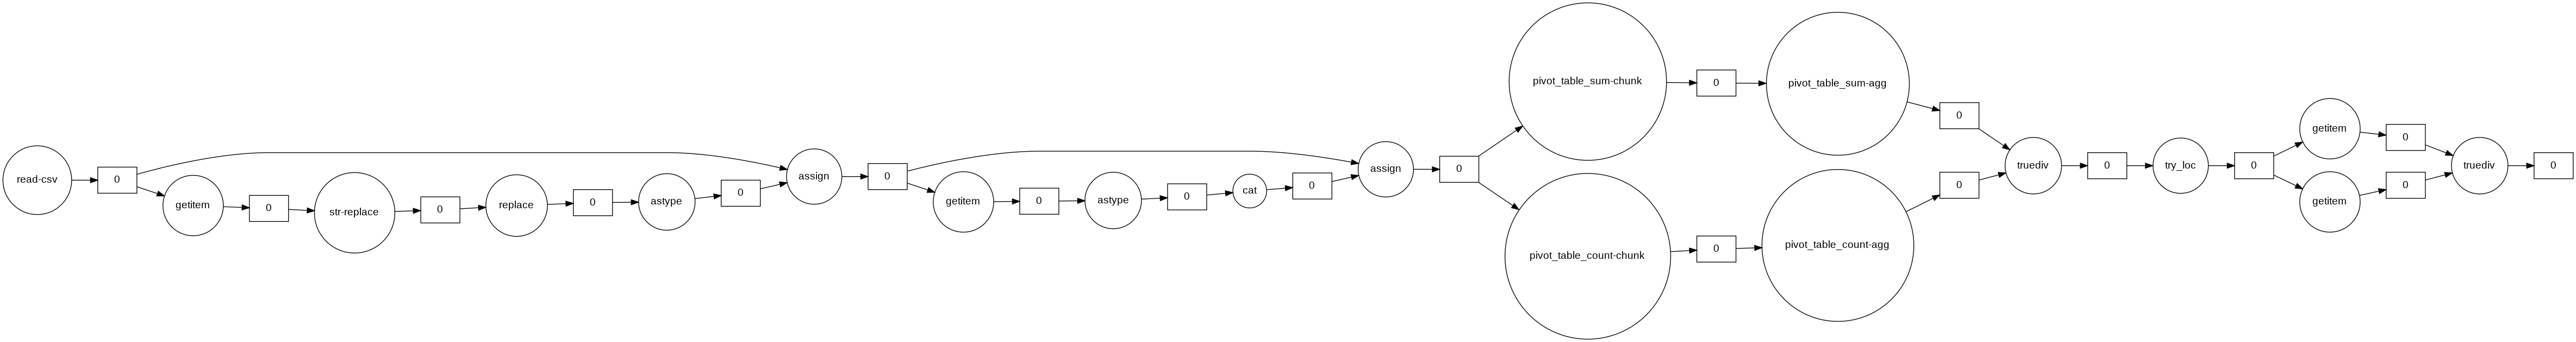

In [ ]:
import PIL
from PIL import Image
img_ = Image.open('10-property.png')
img_

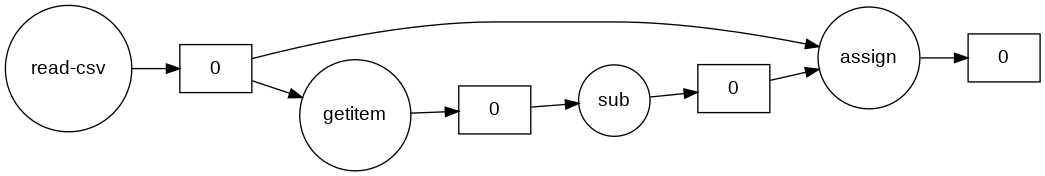

In [ ]:
taxes = dd.read_csv('FY2016-STC-Category-Table.csv', sep='\t')
taxes['year'] = taxes['Survey_Year'] - 2000
taxes.visualize(filename='10-single.png', rankdir='LR')
Image.open('10-single.png')

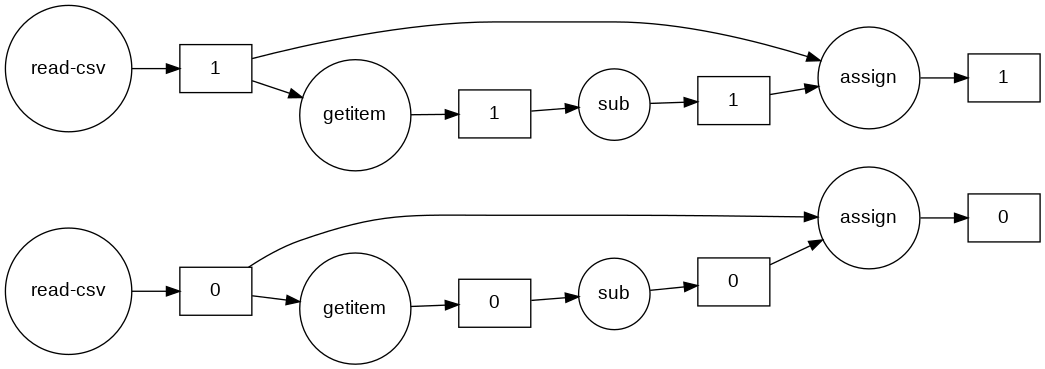

In [ ]:
""" partitioning data """ 
taxes = dd.read_csv('FY2016-STC-Category-Table.csv', sep='\t', blocksize=5000)
taxes['year'] = taxes['Survey_Year'] - 2000
taxes.visualize(filename='10-block.png', rankdir='LR')
Image.open('10-block.png')

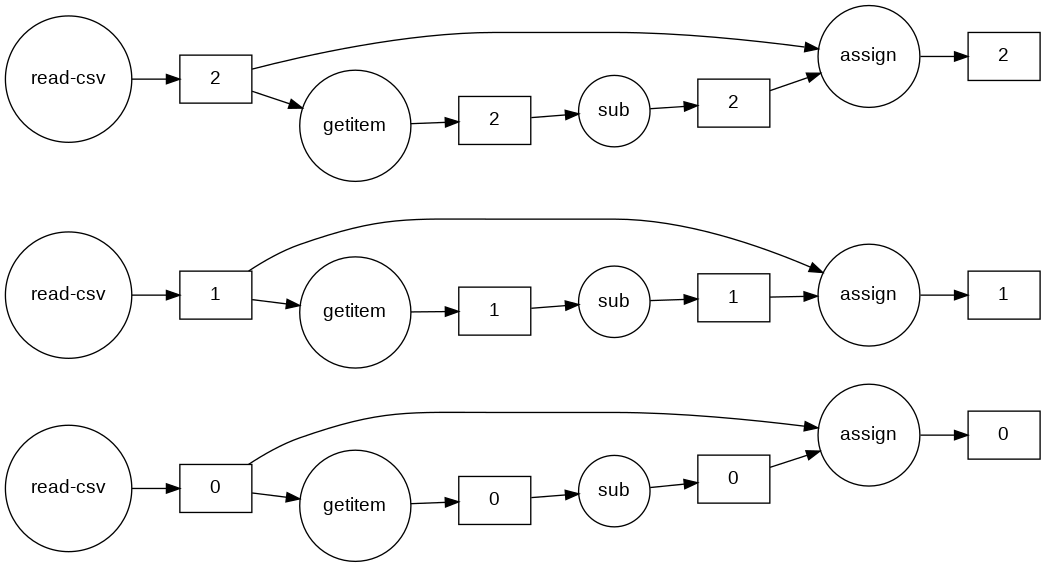

In [ ]:
""" partitioning data """ 
taxes = dd.read_csv('FY2016-STC-Category-Table.csv', sep='\t', blocksize=4000)
taxes['year'] = taxes['Survey_Year'] - 2000
taxes.visualize(filename='10-block.png', rankdir='LR')
Image.open('10-block.png')

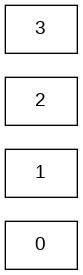

In [ ]:
""" persisting itermediate computations """ 
taxes = dd.read_csv('FY2016-STC-Category-Table.csv', sep='\t', blocksize=3000)
taxes['Amount'] = \
        taxes['Amount'].str.replace(',','').replace('X', np.nan).astype(float)
taxes = taxes.persist()
taxes.visualize(filename='10-persist.png', rankdir='LR')
Image.open('10-persist.png')

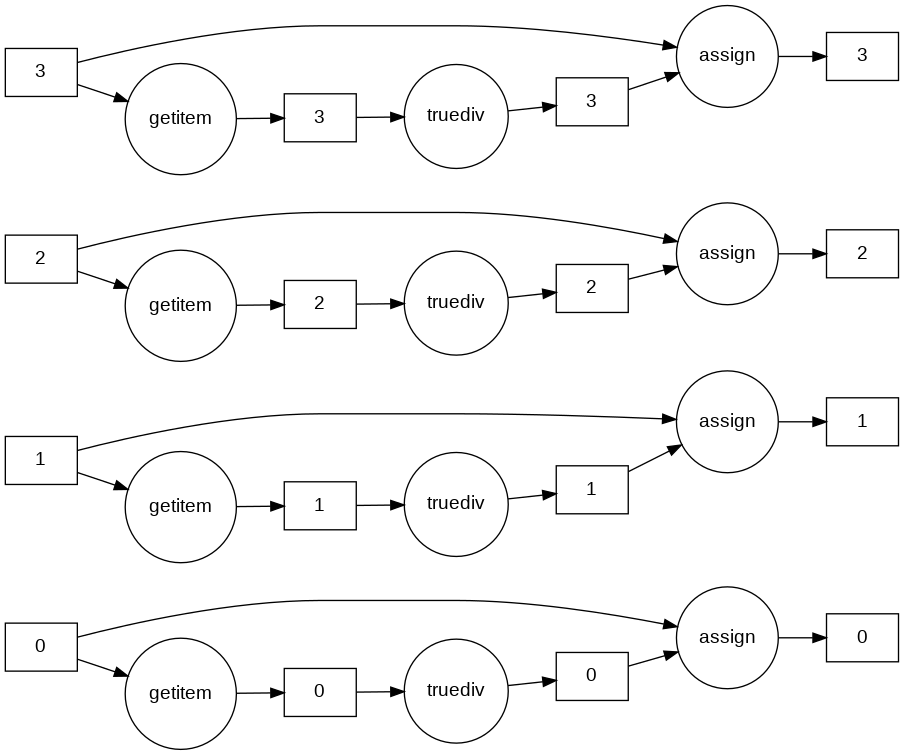

In [ ]:
""" many computations can happen on the partitions without communication """
taxes['k_amount'] = taxes['Amount'] / 1000 
taxes.visualize(filename='10-k.png', rankdir='LR')
Image.open('10-k.png')

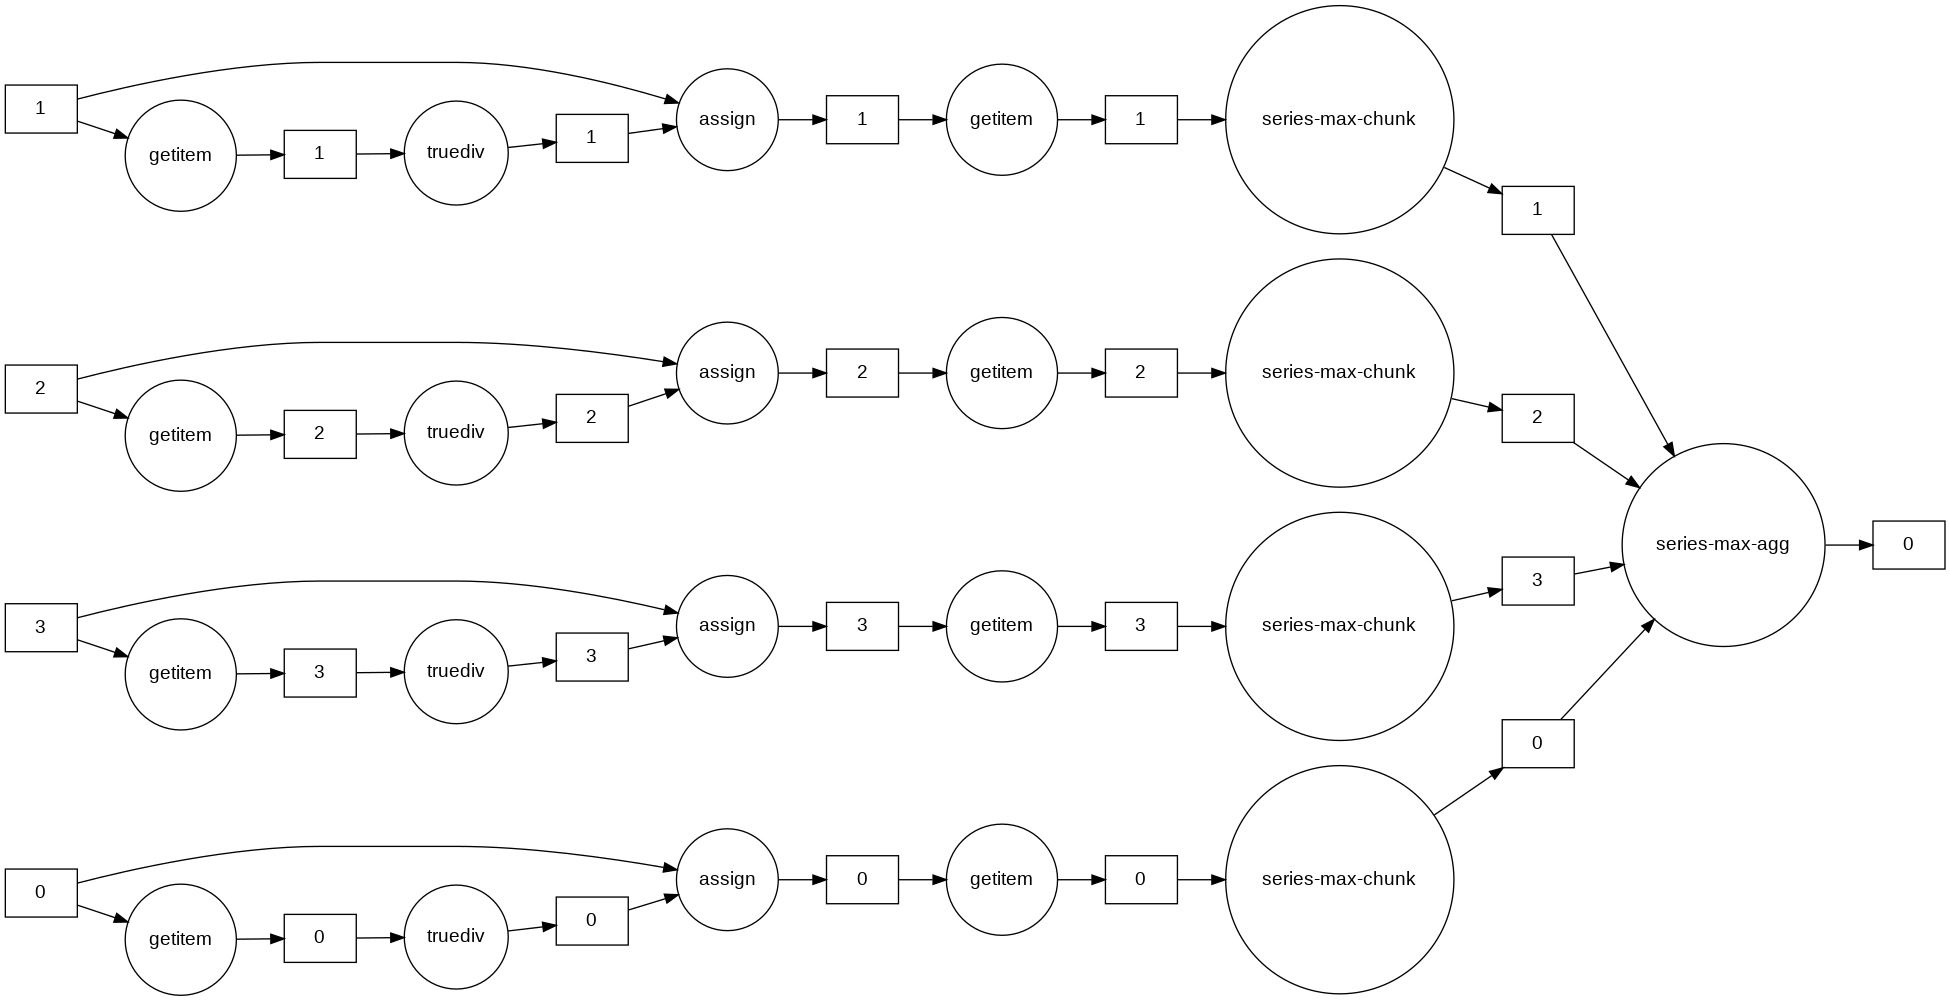

In [ ]:
""" computation that requires reducing parallelism like maximum """
max_k = taxes['k_amount'].max()
max_k.visualize(filename='10-k-max.png', rankdir='LR')
Image.open('10-k-max.png')

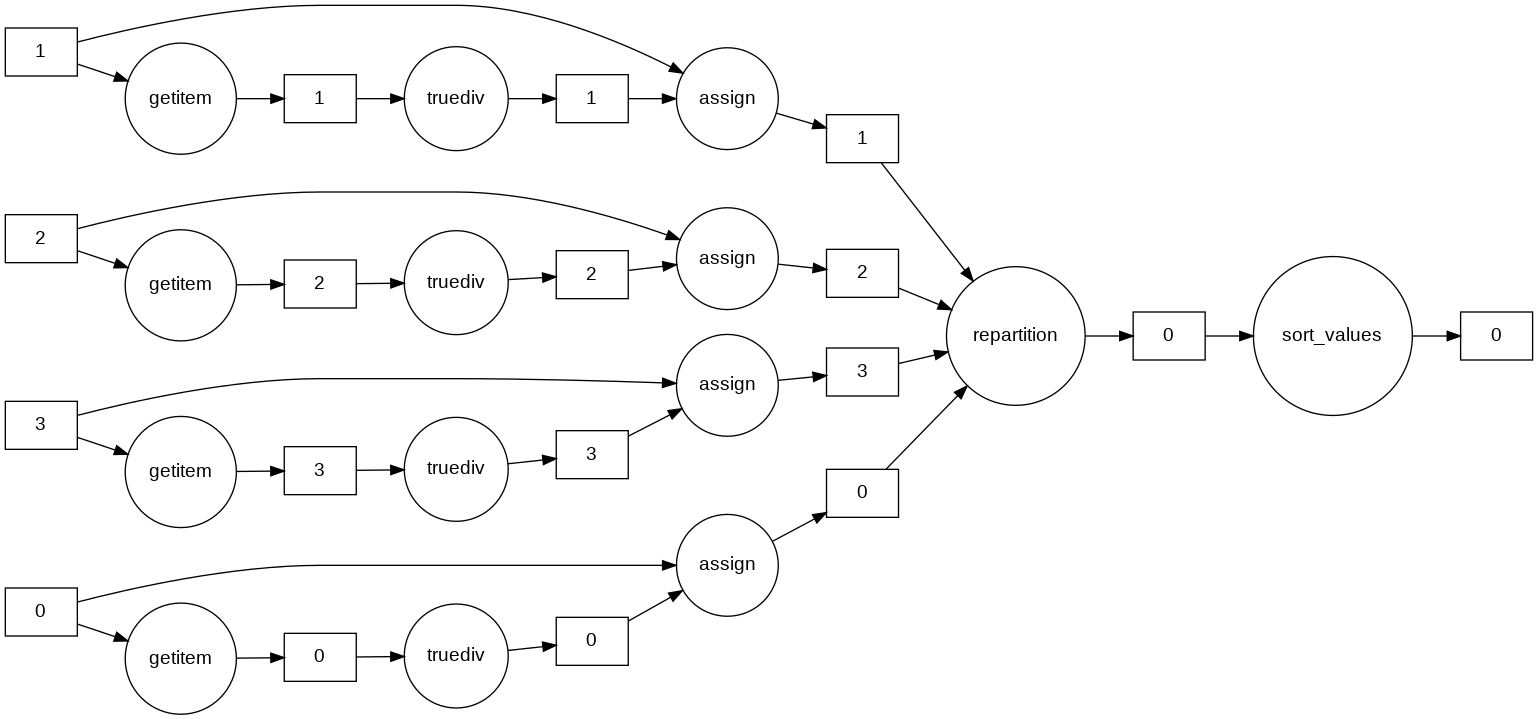

In [ ]:
""" computation complex and expensive like sort values """ 
sort_values = taxes.sort_values('k_amount')
sort_values.visualize(filename='10-k-sv.png', rankdir='LR')
Image.open('10-k-sv.png')

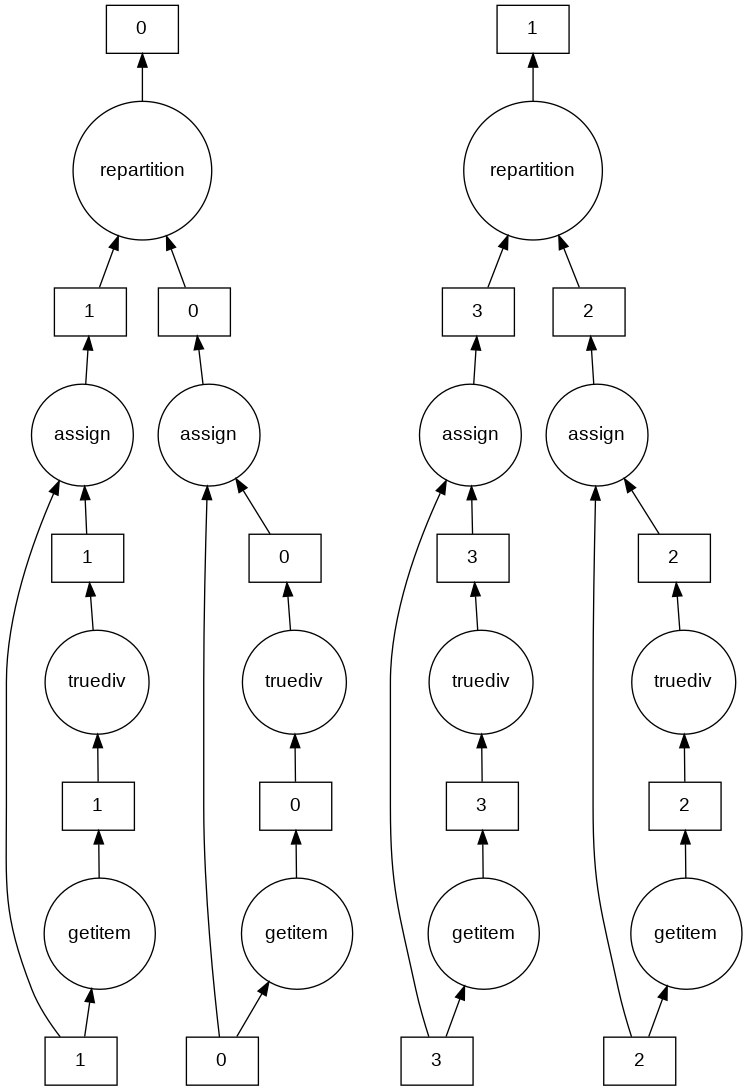

In [ ]:
""" repartitioning data where the granularity of the computation benefits from it """ 
taxes_1 = taxes.repartition(npartitions=2)
taxes_1.visualize(filename='10-repart.png', tankdir='LR')
Image.open('10-repart.png')

In [ ]:
taxes.index.compute(), 

(Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
             ...
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76],
            dtype='int64', length=312),)

In [ ]:
taxes.divisions

(None, None, None, None, None)

In [ ]:
taxes_1.divisions

(None, None, None)

In [ ]:
""" Dask doesn't suppot multiple indexes - limitation with current version
taxes.set_index(['Geo_Name', 'Tax_Type']) """ 
taxes_2 = taxes.repartition(npartitions=2)
taxes_2.set_index(['Geo_Name'])
taxes_2.compute().to_csv('taxes-dask-pandas-format.csv', sep='\t')
taxes_2.npartitions, taxes_2.divisions, taxes_2

(2, (None, None, None), Dask DataFrame Structure:
               Geo_Name state_code Survey_Year Tax_Type    item   Amount k_amount
 npartitions=2                                                                   
                 object      int64       int64   object  object  float64  float64
                    ...        ...         ...      ...     ...      ...      ...
                    ...        ...         ...      ...     ...      ...      ...
 Dask Name: repartition, 18 tasks)

In [ ]:
!cat 'taxes-dask-pandas-format.csv' | grep Alabama

6	Alabama	1	2016	Total Taxes	T00	10355317.0	10355.317
7	Alabama	1	2016	Property Taxes	T01	362515.0	362.515
8	Alabama	1	2016	Sales and Gross Receipts Taxes	TA1	5214390.0	5214.39
9	Alabama	1	2016	License Taxes	TA3	575510.0	575.51
10	Alabama	1	2016	Income Taxes	TA4	4098278.0	4098.278
11	Alabama	1	2016	Other Taxes	TA5	104624.0	104.624


In [ ]:
""" transfer data to persistent storage like in hard disks 
    the persist method computes the objects on each worker """ 
taxes_2.to_csv('partial-*.csv')

['/content/partial-0.csv', '/content/partial-1.csv']

In [ ]:
!cat 'partial-0.csv' | grep Alabama

6,Alabama,1,2016,Total Taxes,T00,10355317.0,10355.317
7,Alabama,1,2016,Property Taxes,T01,362515.0,362.515
8,Alabama,1,2016,Sales and Gross Receipts Taxes,TA1,5214390.0,5214.39
9,Alabama,1,2016,License Taxes,TA3,575510.0,575.51
10,Alabama,1,2016,Income Taxes,TA4,4098278.0,4098.278
11,Alabama,1,2016,Other Taxes,TA5,104624.0,104.624


In [ ]:
""" remember we have two partitions, we can merge into one """ 
taxes_2.to_parquet('taxes_2.parquet')

(None,)

In [ ]:
from pyarrow import parquet
taxes_2_pq = parquet.read_table('taxes_2.parquet')
taxes_pd = taxes_2_pq.to_pandas()
taxes_2_pq, taxes_pd

(pyarrow.Table
 Geo_Name: string
 state_code: int64
 Survey_Year: int64
 Tax_Type: string
 item: string
 Amount: double
 k_amount: double
 __null_dask_index__: int64
 ----
 Geo_Name: [["United States","United States","United States","United States","United States",...,"Mississippi","Mississippi","Mississippi","Missouri","Missouri"],["Missouri","Missouri","Missouri","Missouri","Montana",...,"Wyoming","Wyoming","Wyoming","Wyoming","Wyoming"]]
 state_code: [[0,0,0,0,0,...,25,25,25,26,26],[26,26,26,26,27,...,51,51,51,51,51]]
 Survey_Year: [[2016,2016,2016,2016,2016,...,2016,2016,2016,2016,2016],[2016,2016,2016,2016,2016,...,2016,2016,2016,2016,2016]]
 Tax_Type: [["Total Taxes","Property Taxes","Sales and Gross Receipts Taxes","License Taxes","Income Taxes",...,"License Taxes","Income Taxes","Other Taxes","Total Taxes","Property Taxes"],["Sales and Gross Receipts Taxes","License Taxes","Income Taxes","Other Taxes","Total Taxes",...,"Property Taxes","Sales and Gross Receipts Taxes","License 

In [ ]:
""" Dask distributed scheduler 

there ia a default scheduler in the collection if one isn't specified 
tell explicitly a graph scheduler what happens 
data frames scheduler by definition is multi-threaded, a single-processing 
or multi processing. The single-threaded used forsequencing tasks 

Scale out: Distributed scheduler is used to schedule tasks in a distributed 
environment, typically in HPC for all the computing modules in built-in scheduler 

Architecture 
____________________________________________

Client -1       Scheduler -1    Worker      Worker 
 compute          compute         compute     compute 

---               ---             ---         ---

Client -N       Scheduler -N    Worker      Worker 
 compute          compute         compute     compute 

 1. Single centralized scheduler responsible for all the tasks to the workers
    it comes with a UI dashboard that lists the status per worker, graph, profiling
 2. Workers responsible for executing the workloads - configure as many workers
    and a worker to have as many threads per machine (parallelism done with 
    as many threads as CPU cores or via processes worker per CPU)
 3. Clients deploying tasks on the scheduler 
"""
import dask 
from dask.base import get_scheduler 

df = dd.read_csv('FY2016-STC-Category-Table.csv')
get_scheduler(collections=[df]).__module__

'dask.threaded'

In [ ]:
!which dask-scheduler

/usr/local/bin/dask-scheduler


In [ ]:
!dask-scheduler --port 8786 --dashboard-address 8787 & > dask-s.out

In [ ]:
!dask-worker --nprocs auto 127.0.0.1:8786

In [ ]:
""" executes locally/on server """ 

from pprint import pprint 
import dask.dataframe as dd 
from dask.distributed import Client 
client = Client('127.0.0.1:8786')
print(client)
for what, instances in client.get_versions().items():
  print(what)
  if what == 'workers':
    for name, instance in instances:
      print(name)
      pprint(instance)
  else:
    pprint(instances)
"""
scheduler
{'host': {'LANG': 'en_US.UTF-8',
          'LC_ALL': 'None',
          'OS': 'Darwin',
          'OS-release': '18.7.0',
          'byteorder': 'little',
          'machine': 'x86_64',
          'processor': 'i386',
          'python': '3.9.7.final.0',
          'python-bits': 64},
 'packages': {'blosc': None,
              'cloudpickle': '2.0.0',
              'dask': '2021.10.0',
              'distributed': '2021.10.0',
              'lz4': None,
              'msgpack': '1.0.2',
              'numpy': '1.20.3',
              'pandas': '1.3.4',
              'python': '3.9.7.final.0',
              'toolz': '0.11.1',
              'tornado': '6.1'}}
"""

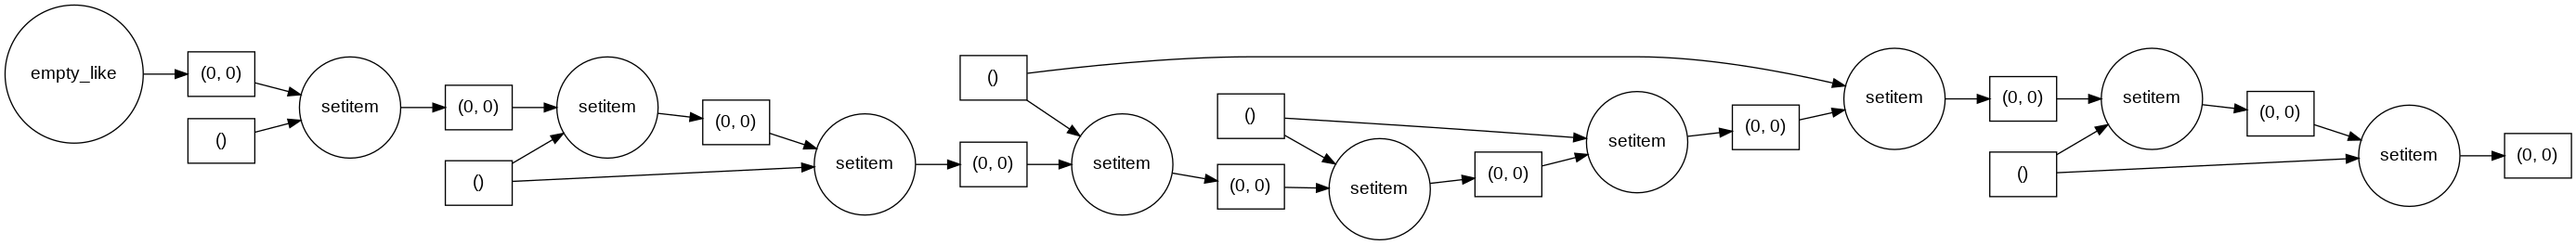

In [ ]:
""" Mandelbrot proble with Dask Distributed """ 
import dask
def compute_point_(c):
  i = -1
  z = complex(0, 0)
  max_iter = 200
  while abs(z) < 2:
    i += 1 
    if i == max_iter: 
      break 
    z = z**2 + c 
  return 255 - (255*i) //max_iter

def prepare_pos_array(size, start, end, pos_array):
  size = pos_array.shape[0]
  startx, starty = start
  endx, endy = end 
  for xp in range(size):
    x = (endx - startx)*(xp/size) + startx
    for yp in range(size):
      y = (endy - starty)*(yp/size) + starty
      pos_array[yp, xp] = compute_point_(complex(x, y))

start = -1.5, -1.5 
end = 0.5, 1.5
size = 3
pos_array = dask.array.empty((size, size), dtype=np.complex128)
prepare_pos_array(size, start, end, pos_array)
pos_array.visualize('10-size3-mandelbrot.png', rankdir='LR')
Image.open('10-size3-mandelbrot.png')

In [ ]:
dask.array.empty((size, size,), dtype=np.complex128)

dask.array<empty_like, shape=(3, 3), dtype=complex128, chunksize=(3, 3), chunktype=numpy.ndarray>

(3, 3) (5000, 5000) (3, 3)


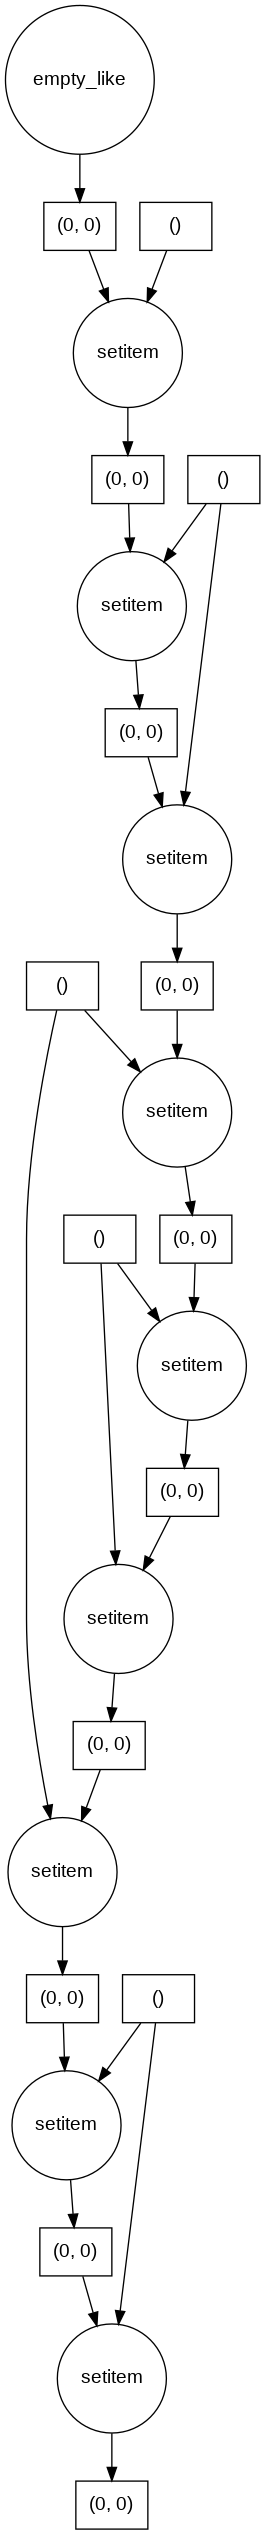

In [ ]:
size = 5000
range_array = dask.array.arange(0, size*size).reshape(size,size)
range_array_ = pos_array.rechunk(size // 2, size // 2)
range_array_.visualize('10-rechunk.png', rankdir='TB')
range_array = range_array.persist()
print(pos_array.shape, range_array.shape, range_array_.shape)
Image.open('10-rechunk.png')

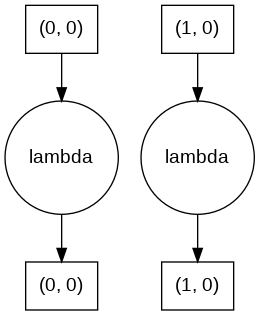

In [ ]:
def block_prepare_pos_array(size, pos_array):
  n_rows, n_cols = pos_array.shape
  output = np.empty(shape=(n_rows, n_cols), dtype=np.complex128)
  startx, starty = start 
  endx, endy = end 
  for row in range(n_rows):
    x = (endx - startx) * ((pos_array[row, 0] // size) / size ) + startx
    for col in range(n_cols):
      y = (endy - starty) * ((pos_array[row, col] % size) / size) + starty
      output[row, col] = complex(x, y)
  return output 

pos_array = dask.array.blockwise(
    lambda x: block_prepare_pos_array(size, x), 
    'ij', range_array, 'ij', dtype=np.complex128
)
pos_array.visualize('10-blockwise.png', rankdir='TB')
Image.open('10-blockwise.png')

In [ ]:
import dask
def compute_point_(c):
  i = -1
  z = complex(0, 0)
  max_iter = 200
  while abs(z) < 2:
    i += 1 
    if i == max_iter: 
      break 
    z = z**2 + c 
  return 255 - (255*i) //max_iter

u_compute_point = dask.array.frompyfunc(compute_point, 1, 1)
image_arr = u_compute_point(pos_array)
image_ = Image.fromarray(image_arr, mode='P')
image_.save('mandelbrot-w_dask.png')

In [ ]:
from time import time
def time_scenario(size, persist_range, persist_pos, chunk_div=10):
    start_time = time()
    size = size
    range_array = dask.array.arange(0, size*size).reshape(size, size).persist()
    range_array = range_array.rechunk(size // chunk_div, size // chunk_div)
    range_array = range_array.persist() if persist_range else range_array
    pos_array = dask.array.blockwise(
        lambda x: block_prepare_pos_array(size, x),
        'ij', range_array, 'ij', dtype=np.complex128)
    pos_array = pos_array.persist() if persist_pos else pos_array
    image_arr = u_compute_point(pos_array)
    image_arr.visualize("task_graph.png", rankdir="TB")
    image_arr.compute()
    return time() - start_time

In [ ]:
size = 500
time_scenario(size, False, False, 2)